# **Initialization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Hide all warnings
warnings.filterwarnings('ignore')

In [2]:
# Filepath init
filepath = 'https://github.com/gr-oll/susFin/raw/refs/heads/main/Data/'

# **Exercise 1**

In [3]:
# Install openpyxl if not already installed
#%pip install openpyxl

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Extracting the data and formatting the dataset
monthly_return = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
monthly_return_melted = monthly_return.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
monthly_return_melted.rename(columns={'NAME': 'Name'}, inplace=True)

In [4]:
# Extracting the country-region dataset and merging it to the previous one
static = pd.read_excel(filepath + 'Static.xlsx')
df_ex1 = pd.merge(monthly_return_melted, static, on=['Name','ISIN'], how='outer')

In [5]:
# Filtering the rows of interest
df_ex1 = df_ex1[df_ex1['Region'] == 'PAC']
df_ex1 = df_ex1[(pd.to_datetime(df_ex1['year']) >= '2013-12-31') & (pd.to_datetime(df_ex1['year']) <= '2023-12-31')]

In [6]:
# Sorting to facilitate comprehension
df_ex1.sort_values(by=['Name', 'year'], inplace=True)

In [7]:
# New col with percentage change between two months
df_ex1['individual_monthly_return'] = df_ex1.groupby('Name')['monthly_return'].pct_change()

In [8]:
df_ex1

,Name,ISIN,year,monthly_return,Country,Region,individual_monthly_return
1074,77 BANK,JP3352000008,2013-12-31 00:00:00,0.68,JP,PAC,NaN
1075,77 BANK,JP3352000008,2014-01-31 00:00:00,0.66,JP,PAC,-0.029412
1076,77 BANK,JP3352000008,2014-02-28 00:00:00,0.62,JP,PAC,-0.060606
1077,77 BANK,JP3352000008,2014-03-31 00:00:00,0.64,JP,PAC,0.032258
1078,77 BANK,JP3352000008,2014-04-30 00:00:00,0.64,JP,PAC,0.000000
...,...,...,...,...,...,...,...
770389,YUEXIU PROPERTY COMPANY,HK0000745908,2023-08-31 00:00:00,62.82,HK,PAC,-0.055906
770390,YUEXIU PROPERTY COMPANY,HK0000745908,2023-09-29 00:00:00,58.43,HK,PAC,-0.069882
770391,YUEXIU PROPERTY COMPANY,HK0000745908,2023-10-31 00:00:00,54.23,HK,PAC,-0.071881
770392,YUEXIU PROPERTY COMPANY,HK0000745908,2023-11-30 00:00:00,47.52,HK,PAC,-0.123732


In [9]:
# Dropping the 31.12.2013 rows (not included in our timeframe but necessary for the pct_change of 31.12.2014)
df_ex1 = df_ex1[pd.to_datetime(df_ex1['year']).dt.year >= 2014]

In [10]:
# Filtering by non missing escores (2013-2024) complete dataset to allow comparisons
escore = pd.read_excel(filepath + 'DS_EScore_Y.xlsx')
melted_escore = escore.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="escore")
melted_escore.rename(columns={'NAME': 'Name'}, inplace=True)
melted_escore['year'] = pd.to_datetime(melted_escore['year'], format='%Y')
escore_interest = pd.merge(melted_escore, static, how='outer')
escore_interest = escore_interest[(escore_interest['year'] >= '2013-01-01') & (melted_escore['year'] <= '2024-12-31')]
escore_interest = escore_interest[escore_interest['Region'] == 'PAC']


In [11]:
escore_interest

,Name,ISIN,year,escore,Country,Region
89,77 BANK,JP3352000008,2013-01-01,15.25,JP,PAC
90,77 BANK,JP3352000008,2014-01-01,15.56,JP,PAC
91,77 BANK,JP3352000008,2015-01-01,18.65,JP,PAC
92,77 BANK,JP3352000008,2016-01-01,21.43,JP,PAC
93,77 BANK,JP3352000008,2017-01-01,22.29,JP,PAC
...,...,...,...,...,...,...
62402,YUEXIU PROPERTY COMPANY,HK0000745908,2019-01-01,85.79,HK,PAC
62403,YUEXIU PROPERTY COMPANY,HK0000745908,2020-01-01,83.72,HK,PAC
62404,YUEXIU PROPERTY COMPANY,HK0000745908,2021-01-01,80.73,HK,PAC
62405,YUEXIU PROPERTY COMPANY,HK0000745908,2022-01-01,76.96,HK,PAC


In [12]:
filtered = escore_interest.groupby('ISIN')['escore'].count().reset_index()
filtered = filtered[filtered['escore'] == 11]
filtered 


,ISIN,escore
1,AU000000ALL7,11
2,AU000000AMP6,11
3,AU000000ANN9,11
4,AU000000ANZ3,11
5,AU000000APA1,11
...,...,...
493,SG1T75931496,11
495,SG1V61937297,11
497,SG9999000020,11
499,SGXE21576413,11


In [13]:
interest_companies = filtered['ISIN'].tolist()


In [14]:
# Filtering df_ex1 to include only non missing escores
df_ex1 = df_ex1[df_ex1['ISIN'].isin(interest_companies)]

In [15]:
df_ex1[df_ex1['monthly_return'].isna()]
df_ex1

,Name,ISIN,year,monthly_return,Country,Region,individual_monthly_return
1075,77 BANK,JP3352000008,2014-01-31 00:00:00,0.66,JP,PAC,-0.029412
1076,77 BANK,JP3352000008,2014-02-28 00:00:00,0.62,JP,PAC,-0.060606
1077,77 BANK,JP3352000008,2014-03-31 00:00:00,0.64,JP,PAC,0.032258
1078,77 BANK,JP3352000008,2014-04-30 00:00:00,0.64,JP,PAC,0.000000
1079,77 BANK,JP3352000008,2014-05-30 00:00:00,0.68,JP,PAC,0.062500
...,...,...,...,...,...,...,...
770389,YUEXIU PROPERTY COMPANY,HK0000745908,2023-08-31 00:00:00,62.82,HK,PAC,-0.055906
770390,YUEXIU PROPERTY COMPANY,HK0000745908,2023-09-29 00:00:00,58.43,HK,PAC,-0.069882
770391,YUEXIU PROPERTY COMPANY,HK0000745908,2023-10-31 00:00:00,54.23,HK,PAC,-0.071881
770392,YUEXIU PROPERTY COMPANY,HK0000745908,2023-11-30 00:00:00,47.52,HK,PAC,-0.123732


In [16]:
# Individual handling of the 5 missings
df_ex1['individual_monthly_return'].loc[592512] = -1.
df_ex1['individual_monthly_return'].loc[592513] = np.nan
df_ex1['individual_monthly_return'].loc[592514] = np.nan
df_ex1['individual_monthly_return'].loc[592515] = np.nan
df_ex1['individual_monthly_return'].loc[698819] = -1.


In [17]:
# Creation of the averaged returns and their std + merge
annualization_mean = df_ex1.groupby('Name')['individual_monthly_return'].mean()
annualization_mean = pd.DataFrame(annualization_mean)
annualization_mean.rename(columns={'individual_monthly_return': 'monthly_mean'}, inplace=True)

annualization_var = df_ex1.groupby('Name')['individual_monthly_return'].std()
annualization_var = pd.DataFrame(annualization_var)
annualization_var.rename(columns={'individual_monthly_return': 'monthly_std'}, inplace=True)

annualization = pd.merge(annualization_mean, annualization_var, on='Name', how='outer')

In [18]:
# Creation of annualized cols
annualization['annualized_mean'] = annualization['monthly_mean'] * 12
annualization['annualized_std'] = annualization['monthly_std'] * np.sqrt(12)

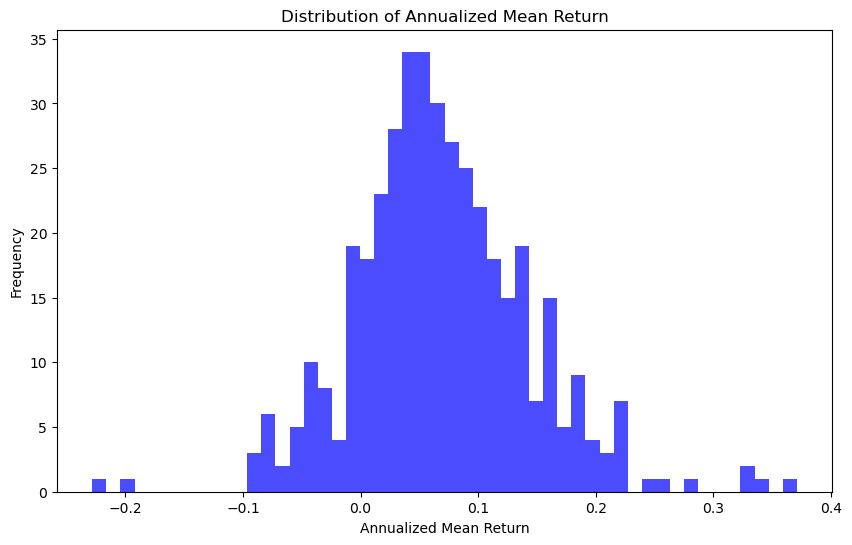

In [19]:
# Annualized mean histogram
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_mean'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Mean Return')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Mean Return')
plt.show()

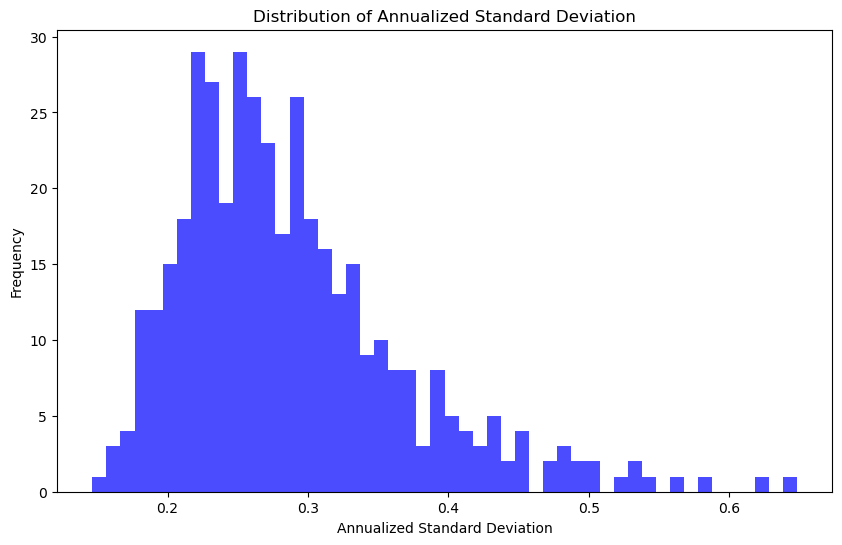

In [20]:
# Annualized std histogram
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_std'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Standard Deviation')
plt.show()

In [21]:
# Variance-covariance matrix
np.corrcoef(annualization['annualized_mean'], annualization['annualized_std'])

array([[1.        , 0.08510139],
       [0.08510139, 1.        ]])

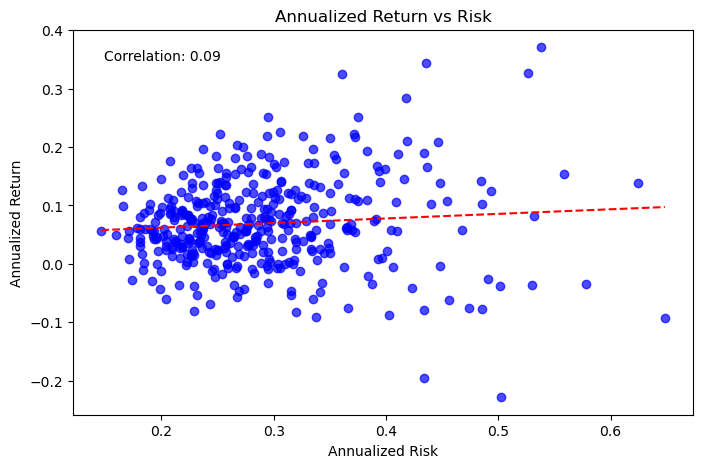

In [22]:
# Define annualized_returns DataFrame
annualized_returns = annualization[['annualized_std', 'annualized_mean']].rename(columns={'annualized_std': 'RISK', 'annualized_mean': 'RET_PCT'})

plt.figure(figsize=(8, 5))
plt.scatter(annualized_returns['RISK'], annualized_returns['RET_PCT'], color='blue', alpha=0.7)
plt.xlabel('Annualized Risk')
plt.ylabel('Annualized Return')
plt.title('Annualized Return vs Risk')

# Compute correlation
corr = annualized_returns['RISK'].corr(annualized_returns['RET_PCT'])

# Add a trendline
slope, intercept = np.polyfit(annualized_returns['RISK'], annualized_returns['RET_PCT'], 1)
x = np.linspace(annualized_returns['RISK'].min(), annualized_returns['RISK'].max(), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', linestyle='--', label='Trendline')

# Display correlation on the plot
plt.text(
    0.05, 0.95,
    f'Correlation: {corr:.2f}',
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top'
)

plt.show()

# **Exercise 2**

In [23]:
# Extracting and merging monthly datasets
#monthly returns with dididend payments
M_ret = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
melted_M_ret = M_ret.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
melted_M_ret['year'] = pd.to_datetime(melted_M_ret['year'], format='%Y-%m-%d')
#monthly market value
M_mval = pd.read_excel(filepath + 'DS_MV_USD_M.xlsx')
melted_M_mval = M_mval.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_market_value")
melted_M_mval['year'] = pd.to_datetime(melted_M_mval['year'], format='%Y-%m-%d')


In [24]:
# Risk-free rates dataset
risk_free = pd.read_excel(filepath + 'Risk_Free_Rate.xlsx')
risk_free.rename(columns={'Unnamed: 0': 'year'}, inplace=True)
risk_free['year'] = pd.to_datetime(risk_free['year'], format='%Y%m')

In [25]:
# Merging the datasets
df_ex2 = pd.merge(melted_M_ret, melted_M_mval, on=['NAME', 'ISIN', 'year'], how='outer')
df_ex2.rename(columns={'NAME': 'Name'}, inplace=True)
df_ex2 = pd.merge(df_ex2, static, on=['Name', 'ISIN'], how='outer')

In [26]:
# Filter region and years of interest
df_ex2 = df_ex2[df_ex2['Region'] == 'PAC']
df_ex2 = df_ex2[(df_ex2['year'] >= '2013-12-31') & (df_ex2['year'] <= '2023-12-31')]
df_ex2['year'] = pd.to_datetime(df_ex2['year'])

In [27]:
# Filter same companies as in ex1 (non missing escores from 2013 to 2024)
df_ex2 = df_ex2[df_ex2['ISIN'].isin(interest_companies)]

In [28]:
df_ex2[df_ex2['monthly_return'].isna()]

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region
592512,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-09-29,NaN,0.0,JP,PAC
592513,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-10-31,NaN,0.0,JP,PAC
592514,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-11-30,NaN,0.0,JP,PAC
592515,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-12-29,NaN,0.0,JP,PAC
698819,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,0.0,JP,PAC


In [29]:
# Returns percentage change and drop the 31.12.2013 rows
df_ex2['pct_monthly_return'] = df_ex2.groupby('Name')['monthly_return'].pct_change()
df_ex2 = df_ex2[pd.to_datetime(df_ex2['year']).dt.year >= 2014]

In [30]:
# Individual handling of the 5 missings
df_ex2['pct_monthly_return'].loc[592512] = -1.
df_ex2['pct_monthly_return'].loc[592513] = np.nan
df_ex2['pct_monthly_return'].loc[592514] = np.nan
df_ex2['pct_monthly_return'].loc[592515] = np.nan
df_ex2['pct_monthly_return'].loc[698819] = -1.


In [31]:
df_ex2[df_ex2['monthly_return'].isna()]

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region,pct_monthly_return
592512,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-09-29,NaN,0.0,JP,PAC,-1.0
592513,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-10-31,NaN,0.0,JP,PAC,NaN
592514,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-11-30,NaN,0.0,JP,PAC,NaN
592515,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-12-29,NaN,0.0,JP,PAC,NaN
698819,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,0.0,JP,PAC,-1.0


In [32]:
# Building the equally weighted portfolio
ew_pf = df_ex2.groupby('year')['pct_monthly_return'].sum().reset_index()

In [33]:
# Dividing the return by the number of assets for each month
ew_pf['ew_m_ret'] = 0
for month in df_ex2['year'].unique():
    ew_pf.loc[ew_pf['year'] == month, 'ew_m_ret'] = ew_pf.loc[ew_pf['year'] == month, 'pct_monthly_return'] / len(df_ex2[df_ex2['year'] == month]['Name'].unique())

In [34]:
# Calculate the market value share
df_ex2['mv_share'] = df_ex2['monthly_market_value'] / df_ex2.groupby('year')['monthly_market_value'].transform('sum')

In [35]:
# Weight the returns by the market value share shifted as in the exercise sheet
df_ex2['mv_return'] = df_ex2['pct_monthly_return'] * df_ex2['mv_share'].shift(1)

In [36]:
# Market value weighted portfolio
mw_pf = df_ex2.groupby('year')['mv_return'].sum().reset_index()

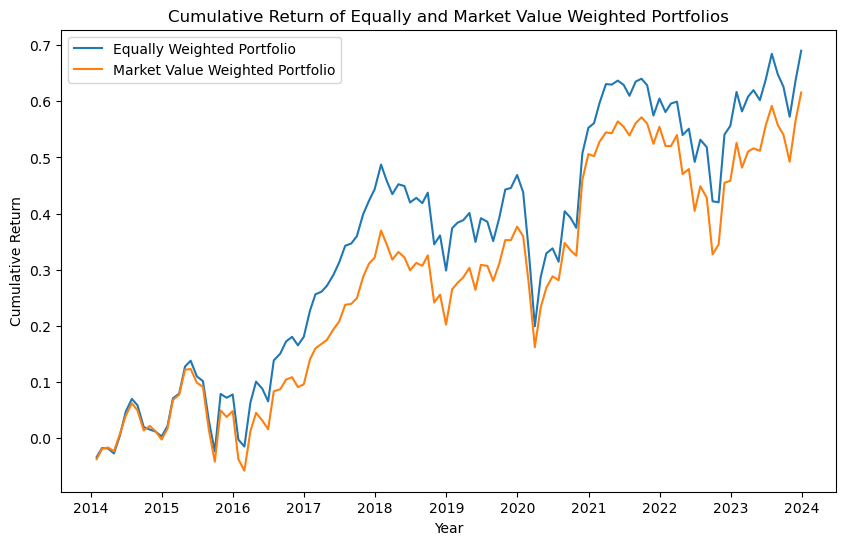

In [37]:
# Plot the monthly adapted returns for both portfolios
plt.figure(figsize=(10, 6))
plt.plot(ew_pf['year'], ew_pf['ew_m_ret'].cumsum(), label='Equally Weighted Portfolio')
plt.plot(mw_pf['year'], mw_pf['mv_return'].cumsum(), label='Market Value Weighted Portfolio')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Equally and Market Value Weighted Portfolios')
plt.legend()
plt.show()

In [38]:
# Risk free rate in the given period 
risk_free = risk_free[(pd.to_datetime(risk_free['year']).dt.year >= 2014) & (pd.to_datetime(risk_free['year']).dt.year <= 2023)]
# Annualized risk free rate
ann_rf = risk_free['RF'].mean() * 12 / 100

In [39]:
# Statistics of interest Equally Weighted Portfolio
# Annualized return
ew_ann_ret = ew_pf['ew_m_ret'].mean() * 12
# Annualized std
ew_ann_std = ew_pf['ew_m_ret'].std() * np.sqrt(12)
#min return
ew_min_ret = ew_pf['ew_m_ret'].min()
#max return
ew_max_ret = ew_pf['ew_m_ret'].max()

# Statistics of interest Market Value Weighted Portfolio
# Annualized return
mw_ann_ret = mw_pf['mv_return'].mean() * 12
# Annualized std
mw_ann_std = mw_pf['mv_return'].std() * np.sqrt(12)
#min return
mw_min_ret = mw_pf['mv_return'].min()
#max return
mw_max_ret = mw_pf['mv_return'].max()


In [40]:
# Equally weighted Sharpe Ratio
ew_sharpe = (ew_ann_ret - ann_rf)/ ew_ann_std
ew_sharpe

0.38387887979603214

In [41]:
# Value weighted Sharpe Ratio
mw_sharpe = (mw_ann_ret - ann_rf)/ mw_ann_std
mw_sharpe


0.35568049703395765

In [42]:
statistics = pd.DataFrame({'Portfolio': ['Equally Weighted', 'Market Value Weighted'],
                           'Annualized Return': [ew_ann_ret, mw_ann_ret],
                           'Annualized Standard Deviation': [ew_ann_std, mw_ann_std],
                           'Sharpe Ratio': [ew_sharpe, mw_sharpe],
                           'Min Return': [ew_min_ret, mw_min_ret],
                           'Max Return': [ew_max_ret, mw_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Equally Weighted,0.069011,0.149373,0.383879,-0.136916,0.132389
1,Market Value Weighted,0.061567,0.140286,0.355680,-0.115458,0.135156


In [43]:
'''delisted = ['A2B AUSTRALIA DEAD - DELIST.12/04/24',
       'BENESSE HOLDINGS DEAD - DELIST.17/05/24',
       'CSR DEAD - DEAD.10/07/24', 'J S R DEAD - DELIST.25/06/24',
       'LAWSON DEAD - DELIST.24/07/24',
       'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23',
       'TOSHIBA DEAD - DELIST.20/12/23']'''

"delisted = ['A2B AUSTRALIA DEAD - DELIST.12/04/24',\n       'BENESSE HOLDINGS DEAD - DELIST.17/05/24',\n       'CSR DEAD - DEAD.10/07/24', 'J S R DEAD - DELIST.25/06/24',\n       'LAWSON DEAD - DELIST.24/07/24',\n       'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23',\n       'TOSHIBA DEAD - DELIST.20/12/23']"

In [44]:
annualization = annualization.reset_index()

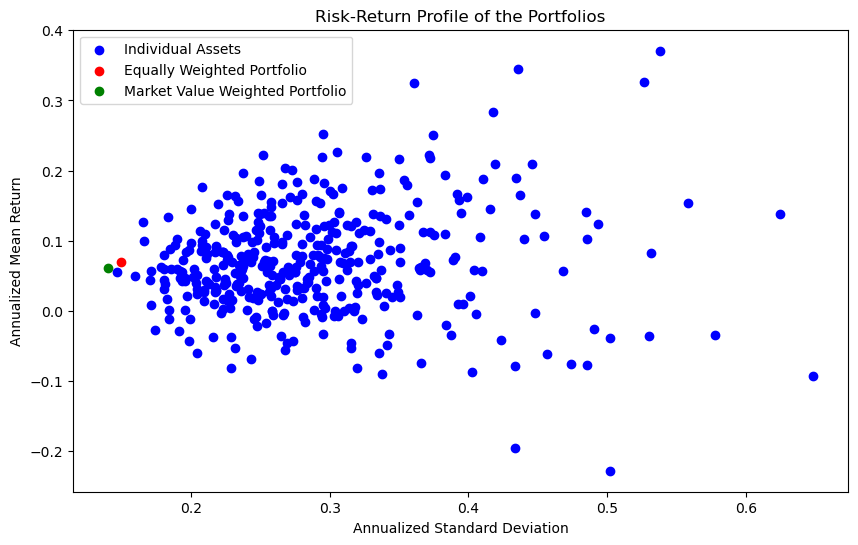

In [45]:
# Define the list of delisted companies
delisted = ['A2B AUSTRALIA DEAD - DELIST.12/04/24',
			'BENESSE HOLDINGS DEAD - DELIST.17/05/24',
			'CSR DEAD - DEAD.10/07/24', 
			'J S R DEAD - DELIST.25/06/24',
			'LAWSON DEAD - DELIST.24/07/24',
			'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23',
			'TOSHIBA DEAD - DELIST.20/12/23']

plt.figure(figsize=(10, 6))
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
#plt.scatter(annualization[annualization['Name'].isin(delisted)]['annualized_std'], annualization[annualization['Name'].isin(delisted)]['annualized_mean'], color='cyan')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.savefig('riskreturn.png')
plt.show()

# **Exercise 3**

In [46]:
# Extracting and merging monthly datasets
#monthly returns with dididend payments
M_ret = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
melted_M_ret = M_ret.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
melted_M_ret['year'] = pd.to_datetime(melted_M_ret['year'], format='%Y-%m-%d')

In [47]:
#monthly market value
M_mval = pd.read_excel(filepath + 'DS_MV_USD_M.xlsx')
melted_M_mval = M_mval.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_market_value")
melted_M_mval['year'] = pd.to_datetime(melted_M_mval['year'], format='%Y-%m-%d')


In [48]:
# Merging the datasets
df_ex3 = pd.merge(melted_M_ret, melted_M_mval, on=['NAME', 'ISIN', 'year'], how='outer')
df_ex3.rename(columns={'NAME': 'Name'}, inplace=True)
df_ex3 = pd.merge(df_ex3, static, on=['Name', 'ISIN'], how='outer')

In [49]:
# Filter region and years of interest
df_ex3 = df_ex3[df_ex3['Region'] == 'PAC']
df_ex3 = df_ex3[(df_ex3['year'] >= '2012-12-31') & (df_ex3['year'] <= '2023-12-31')]

In [50]:
# Filter df_ex3 to the same companies of interest as before (non missing escore from 2013 to 2024)
df_ex3 = df_ex3[df_ex3['ISIN'].isin(interest_companies)]

In [51]:
# Ensure the 'year' column in escore is datetime type
melted_escore['year'] = pd.to_datetime(melted_escore['year'], format='%Y')

# Merge the dataframes using merge_asof to align yearly escore data with monthly df_ex3 data
df_ex3 = pd.merge_asof(df_ex3.sort_values('year'), 
                                melted_escore.sort_values('year'), 
                                by=['Name', 'ISIN'], 
                                on='year', 
                                direction='backward')

In [52]:
# Returns percentage change and drop the 31.12.2012 rows
df_ex3['pct_monthly_return'] = df_ex3.groupby('Name')['monthly_return'].pct_change()
df_ex3 = df_ex3[pd.to_datetime(df_ex3['year']).dt.year >= 2013]

In [53]:
df_ex3.sort_values(by=['Name', 'year'], inplace=True)

In [54]:
df_ex3 = df_ex3[(df_ex3['year'].dt.year != 2013) & (df_ex3['year'].dt.year != 2012)]

In [55]:
df_ex3[df_ex3['monthly_return'].isna()]

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region,escore,pct_monthly_return
52914,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-09-29,NaN,0.0,JP,PAC,63.93,0.0
53307,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-10-31,NaN,0.0,JP,PAC,63.93,0.0
53701,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-11-30,NaN,0.0,JP,PAC,63.93,0.0
54106,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-12-29,NaN,0.0,JP,PAC,63.93,0.0
54362,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,0.0,JP,PAC,89.52,0.0


In [56]:
# Individual handling of the 5 missings
df_ex3['pct_monthly_return'].loc[52914] = -1.
df_ex3['pct_monthly_return'].loc[53307] = np.nan
df_ex3['pct_monthly_return'].loc[53701] = np.nan
df_ex3['pct_monthly_return'].loc[54106] = np.nan
df_ex3['pct_monthly_return'].loc[54362] = -1.


In [57]:
# Create the variance-covariance matrix for pct_monthly_return
cov_matrix = df_ex3.pivot(index='year', columns='Name', values='pct_monthly_return').cov()

In [58]:
# Install scipy if not already installed
#%pip install scipy

from scipy.optimize import minimize

In [59]:
# Objective function: portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

In [60]:
# Number of assets
num_assets = len(cov_matrix)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
min_variance_weights = result.x

# Display the optimal weights
#min_variance_weights

In [61]:
minvar_pf = df_ex3.groupby('Name')['pct_monthly_return'].mean().reset_index()
minvar_pf['minvar_w'] = min_variance_weights
minvar_pf['annualized_mean'] = minvar_pf['pct_monthly_return'] * 12
minvar_pf['annualized_std'] = minvar_pf['pct_monthly_return'].std() * np.sqrt(12)
# Annualized mean
minvar_ann_ret = (minvar_pf['annualized_mean'] * minvar_pf['minvar_w']).sum()
# Annualized std
minvar_ann_std = minvar_pf['annualized_std'].std() * np.sqrt(12)

In [62]:
#min return
minvar_min_ret = minvar_pf['annualized_mean'].min()
#max return
minvar_max_ret = minvar_pf['annualized_mean'].max()
#minvar pf sharpe ratio
minvar_sharpe = (minvar_ann_ret - ann_rf)/ minvar_ann_std


In [63]:
# Objective function: negative portfolio return (to maximize return)
def portfolio_return(weights, returns):
    return -np.dot(weights, returns)

# Mean returns of the assets
mean_returns = df_ex3.groupby('Name')['pct_monthly_return'].mean().values

# Minimize the negative portfolio return
result_max_return = minimize(portfolio_return, init_guess, args=(mean_returns,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for maximum return portfolio
max_return_weights = result_max_return.x

# Display the optimal weights
# max_return_weights

In [64]:
# Calculate the annualized return of the minimum variance portfolio
minvar_ann_ret = np.sum(min_variance_weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
minvar_ann_std = np.sqrt(np.dot(min_variance_weights.T, np.dot(cov_matrix * 12, min_variance_weights)))

# Calculate the annualized return of the minimum variance portfolio
maxr_ann_ret = np.sum(max_return_weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
maxr_ann_std = np.sqrt(np.dot(max_return_weights.T, np.dot(cov_matrix * 12, max_return_weights)))


In [65]:
maxr_pf = df_ex3.groupby('Name')['pct_monthly_return'].mean().reset_index()
maxr_pf['maxr_w'] = max_return_weights
maxr_pf['annualized_mean'] = maxr_pf['pct_monthly_return'] * 12
maxr_pf['annualized_std'] = maxr_pf['pct_monthly_return'].std() * np.sqrt(12)

In [66]:
#min return
maxr_min_ret = maxr_pf['annualized_mean'].min()
#max return
maxr_max_ret = maxr_pf['annualized_mean'].max()
#minvar pf sharpe ratio
maxr_sharpe = (maxr_ann_ret - ann_rf)/ maxr_ann_std

In [67]:
statistics = pd.DataFrame({'Portfolio': ['Minimum Variance Portfolio', 'Maximum Return Portfolio'],
                           'Annualized Return': [minvar_ann_ret, maxr_ann_ret],
                           'Annualized Standard Deviation': [minvar_ann_std, maxr_ann_std],
                           'Sharpe Ratio': [minvar_sharpe, maxr_sharpe],
                           'Min Return': [minvar_min_ret, maxr_min_ret],
                           'Max Return': [minvar_max_ret, maxr_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Minimum Variance Portfolio,0.052046,0.079459,2.396715e+14,-0.228193,0.370925
1,Maximum Return Portfolio,0.370925,0.538206,6.675044e-01,-0.228193,0.370925


In [68]:
# Compute the efficient frontier portofolios
'''target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, 20)
efficient_frontier = []
for target in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: np.sum(x * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12 - target})
    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier.append(result.x)'''

"target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, 20)\nefficient_frontier = []\nfor target in target_returns:\n    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},\n                   {'type': 'eq', 'fun': lambda x: np.sum(x * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12 - target})\n    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)\n    efficient_frontier.append(result.x)"

In [69]:
# Precompute the mean returns and the annualized mean returns
mean_returns = df_ex3.groupby('Name')['pct_monthly_return'].mean().values
annualized_mean_returns = mean_returns * 12

# Define the constraints function
def constraints(target):
    return [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: np.sum(x * annualized_mean_returns) - target}]

# Compute the efficient frontier portfolios
target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, 20)
efficient_frontier = []

for target in target_returns:
    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints(target))
    efficient_frontier.append(result.x)

# Convert the efficient frontier to a NumPy array for further processing if needed
efficient_frontier = np.array(efficient_frontier)

In [70]:
# Calculate the annualized return and standard deviation for each set of weights in the efficient frontier
target_ann_ret = []
target_ann_std = []

for weights in efficient_frontier:
	ann_ret = np.sum(weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12
	ann_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 12, weights)))
	target_ann_ret.append(ann_ret)
	target_ann_std.append(ann_std)

# Convert lists to numpy arrays
target_ann_ret = np.array(target_ann_ret)
target_ann_std = np.array(target_ann_std)

In [71]:
monthly_rf = risk_free['RF'].mean() / 100 # professor said it in the mail
ann_rf = monthly_rf * 12  # professor explicitly defined annualization as simple multiplication

# Annualized returns and covariance
mean_returns_monthly = df_ex3.groupby('Name')['pct_monthly_return'].mean()
cov_matrix_monthly = df_ex3.pivot(index='year', columns='Name', values='pct_monthly_return').cov()

mean_returns_annual = mean_returns_monthly * 12
cov_matrix_annual = cov_matrix_monthly * 12

num_assets = len(mean_returns_annual)

# Optimization constraints and bounds
init_guess = np.ones(num_assets) / num_assets
bounds = tuple((0, 1) for _ in range(num_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Minimum Variance Portfolio
res_minvar = minimize(portfolio_variance, init_guess, args=(cov_matrix_annual,), method='SLSQP', bounds=bounds, constraints=constraints)
minvar_weights = res_minvar.x
minvar_ann_ret = np.dot(minvar_weights, mean_returns_annual)
minvar_ann_std = np.sqrt(portfolio_variance(minvar_weights, cov_matrix_annual))

# Define the negative portfolio return function
def negative_portfolio_return(weights, mean_returns):
    return -np.sum(weights * mean_returns)

# Maximum Return Portfolio
res_maxret = minimize(negative_portfolio_return, init_guess, args=(mean_returns_annual,), method='SLSQP', bounds=bounds, constraints=constraints)
maxr_weights = res_maxret.x
maxr_ann_ret = np.sum(maxr_weights * mean_returns_annual)
maxr_ann_std = np.sqrt(np.dot(maxr_weights.T, np.dot(cov_matrix_annual, maxr_weights)))

# Efficient frontier
n_portfolios = 5
target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, n_portfolios)
efficient_frontier_std, efficient_frontier_ret = [], []

for target in target_returns:
    constraints_ef = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.sum(x * mean_returns_annual) - target}
    )
    res_ef = minimize(portfolio_variance, init_guess, args=(cov_matrix_annual,), method='SLSQP', bounds=bounds, constraints=constraints_ef)
    w_opt = res_ef.x
    efficient_frontier_std.append(np.sqrt(np.dot(w_opt.T, np.dot(cov_matrix_annual, w_opt))))
    efficient_frontier_ret.append(target)

# Define the negative Sharpe ratio function
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    return -sharpe_ratio

# Tangency portfolio (maximum Sharpe ratio)
res_tan = minimize(negative_sharpe_ratio, init_guess,
                   args=(mean_returns_annual, cov_matrix_annual, ann_rf),
                   method='SLSQP', bounds=bounds, constraints=constraints)

tan_weights = res_tan.x
tan_ret = np.dot(tan_weights, mean_returns_annual)
tan_vol = np.sqrt(np.dot(tan_weights.T, np.dot(cov_matrix_annual, tan_weights)))


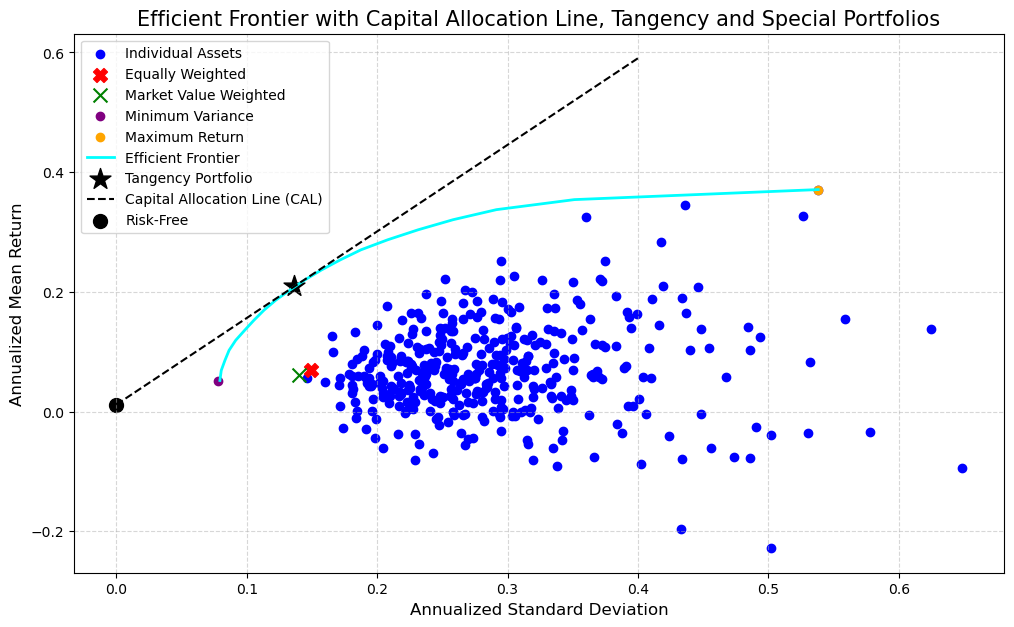

In [72]:

# Final comprehensive plot
plt.figure(figsize=(12, 7))

# Individual assets
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')

# Equally Weighted Portfolio
plt.scatter(ew_ann_std, ew_ann_ret, color='red', marker='X', s=100, label='Equally Weighted')

# Market Value Weighted Portfolio
plt.scatter(mw_ann_std, mw_ann_ret, color='green', marker='x', s=100, label='Market Value Weighted')

# Min Variance Portfolio
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance')

# Max Return Portfolio
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return')

# Efficient frontier
plt.plot(target_ann_std, target_ann_ret, color='cyan', linewidth=2, label='Efficient Frontier')

# Tangency Portfolio
plt.scatter(tan_vol, tan_ret, marker='*', color='black', s=250, label='Tangency Portfolio')

# Capital Allocation Line (CAL)
sigma_range = np.linspace(0, 0.4, 100)
cal_line = ann_rf + (tan_ret - ann_rf)/tan_vol * sigma_range
plt.plot(sigma_range, cal_line, color='black', linestyle='--', label='Capital Allocation Line (CAL)')

# Risk-Free asset
plt.scatter(0, ann_rf, color='black', marker='o', s=100, label='Risk-Free')

# Labels and title
plt.xlabel('Annualized Standard Deviation', fontsize=12)
plt.ylabel('Annualized Mean Return', fontsize=12)
plt.title('Efficient Frontier with Capital Allocation Line, Tangency and Special Portfolios', fontsize=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [73]:
# Compute ex-post returns for each portfolio along the efficient frontier
ex_post_returns = []

for i in efficient_frontier:
    monthly_returns = df_ex3.pivot(index='year', columns='Name', values='pct_monthly_return')
    portfolio_returns = monthly_returns.dot(i)
    ex_post_returns.append(portfolio_returns)

# Calculate ex-post annualized average return, annualized volatility, and Sharpe ratio
ex_post_ann_ret = []
ex_post_ann_std = []
ex_post_sharpe = []

for returns in ex_post_returns:
    ann_ret = returns.mean() * 12
    ann_std = returns.std() * np.sqrt(12)
    sharpe_ratio = (ann_ret - ann_rf) / ann_std
    ex_post_ann_ret.append(ann_ret)
    ex_post_ann_std.append(ann_std)
    ex_post_sharpe.append(sharpe_ratio)

# Find the portfolio with the highest ex-ante and ex-post Sharpe ratio
max_ex_ante_sharpe_idx = np.argmax(target_ann_ret / target_ann_std)
max_ex_post_sharpe_idx = np.argmax(ex_post_sharpe)

'''# Plot the efficient frontier, individual assets, capital allocation line, and portfolios
plt.figure(figsize=(12, 7))

# Individual assets
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')

# Equally Weighted Portfolio
plt.scatter(ew_ann_std, ew_ann_ret, color='red', marker='X', s=100, label='Equally Weighted')

# Market Value Weighted Portfolio
plt.scatter(mw_ann_std, mw_ann_ret, color='green', marker='x', s=100, label='Market Value Weighted')
# Min Variance Portfolio
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance')

# Max Return Portfolio
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return')

# Efficient frontier
plt.plot(target_ann_std, target_ann_ret, color='cyan', linewidth=2, label='Efficient Frontier')

# Capital Allocation Line (CAL)
sigma_range = np.linspace(0, 0.4, 100)
cal_line = ann_rf + (tan_ret - ann_rf)/tan_vol * sigma_range
plt.plot(sigma_range, cal_line, color='black', linestyle='--', label='Capital Allocation Line (CAL)')

# Risk-Free asset
plt.scatter(0, ann_rf, color='black', marker='o', s=100, label='Risk-Free')
#Tangency Portfolio
plt.scatter(tan_vol, tan_ret, marker='*', color='black', s=150, label='Tangency Portfolio')


# Highlight the portfolios with the highest ex-ante and ex-post Sharpe ratio
plt.scatter(target_ann_std[max_ex_ante_sharpe_idx], target_ann_ret[max_ex_ante_sharpe_idx], color='brown', s=40, label='Max Ex-Ante Sharpe Ratio')
plt.scatter(ex_post_ann_std[max_ex_post_sharpe_idx], ex_post_ann_ret[max_ex_post_sharpe_idx], color='indigo', s=40, label='Max Ex-Post Sharpe Ratio')

# Labels and title
plt.xlabel('Annualized Standard Deviation', fontsize=12)
plt.ylabel('Annualized Mean Return', fontsize=12)
plt.title('Efficient Frontier with Capital Allocation Line, Tangency and Special Portfolios', fontsize=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()'''

# Print the performance metrics
print(f"Portfolio with highest ex-ante Sharpe ratio: {max_ex_ante_sharpe_idx}")
print(f"Ex-Ante Sharpe Ratio: {target_ann_ret[max_ex_ante_sharpe_idx] / target_ann_std[max_ex_ante_sharpe_idx]}")
print(f"Ex-Post Sharpe Ratio: {ex_post_sharpe[max_ex_ante_sharpe_idx]}")

print(f"Portfolio with highest ex-post Sharpe ratio: {max_ex_post_sharpe_idx}")
print(f"Ex-Ante Sharpe Ratio: {target_ann_ret[max_ex_post_sharpe_idx] / target_ann_std[max_ex_post_sharpe_idx]}")
print(f"Ex-Post Sharpe Ratio: {ex_post_sharpe[max_ex_post_sharpe_idx]}")

Portfolio with highest ex-ante Sharpe ratio: 9
Ex-Ante Sharpe Ratio: 1.5250736005345231
Ex-Post Sharpe Ratio: 1.4002455536211171
Portfolio with highest ex-post Sharpe ratio: 10
Ex-Ante Sharpe Ratio: 1.521761637699237
Ex-Post Sharpe Ratio: 1.4085019066954876


# **Exercise 4**

In [74]:
# Setting df for ex 4 with the same companies as before
df_ex4 = pd.merge(monthly_return_melted, static, how='outer')
df_ex4 = df_ex4[df_ex4['Region'] == 'PAC']
df_ex4 = df_ex4[df_ex4['ISIN'].isin(interest_companies)]
df_ex4['year'] = pd.to_datetime(df_ex4['year'])

In [75]:
# Filtering by the interesting timeframe
df_ex4 = df_ex4[(df_ex4['year'] >= '2003-12-01') & (df_ex4['year'] <= '2024-12-31')]

In [76]:
# Computing the individual returns
df_ex4['pct_monthly_return'] = df_ex4.groupby('Name')['monthly_return'].pct_change()

In [77]:
df_ex4

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return
954,77 BANK,JP3352000008,2003-12-31,0.70,JP,PAC,NaN
955,77 BANK,JP3352000008,2004-01-30,0.66,JP,PAC,-0.057143
956,77 BANK,JP3352000008,2004-02-27,0.68,JP,PAC,0.030303
957,77 BANK,JP3352000008,2004-03-31,0.78,JP,PAC,0.147059
958,77 BANK,JP3352000008,2004-04-30,0.75,JP,PAC,-0.038462
...,...,...,...,...,...,...,...
770401,YUEXIU PROPERTY COMPANY,HK0000745908,2024-08-30,28.09,HK,PAC,-0.182717
770402,YUEXIU PROPERTY COMPANY,HK0000745908,2024-09-30,43.97,HK,PAC,0.565326
770403,YUEXIU PROPERTY COMPANY,HK0000745908,2024-10-31,45.71,HK,PAC,0.039572
770404,YUEXIU PROPERTY COMPANY,HK0000745908,2024-11-29,40.20,HK,PAC,-0.120543


In [78]:
# Drop December 2003
df_ex4 = df_ex4[df_ex4['year'] >= '2004-01-01']

In [79]:
df_ex4[df_ex4['monthly_return'].isna()]['Name'].unique()

array(['A2B AUSTRALIA DEAD - DELIST.12/04/24', 'AOZORA BANK',
       'BENESSE HOLDINGS DEAD - DELIST.17/05/24', 'CHINA MENGNIU DAIRY',
       'CLEANAWAY WASTE MANAGEMENT', 'CSR DEAD - DEAD.10/07/24', 'DENA',
       'ELEC.POWER DEV.', 'INPEX', 'J S R DEAD - DELIST.25/06/24',
       'LAWSON DEAD - DELIST.24/07/24',
       'LINK REAL ESTATE INVESTMENT TRUST', 'OTSUKA HOLDINGS',
       'PACIFIC BASIN SHIP.',
       'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23', 'SEEK',
       'SOUTHERN CROSS MEDIA GROUP', 'SUMCO', 'T & D HOLDINGS',
       'TOSHIBA DEAD - DELIST.20/12/23'], dtype=object)

In [80]:
# Individual handling of the 5 missings
'A2B AUSTRALIA DEAD - DELIST.12/04/24'
df_ex4['pct_monthly_return'].loc[2104] = -1.
df_ex4['pct_monthly_return'].loc[2105] = np.nan
df_ex4['pct_monthly_return'].loc[2106] = np.nan
df_ex4['pct_monthly_return'].loc[2107] = np.nan
df_ex4['pct_monthly_return'].loc[2108] = np.nan
df_ex4['pct_monthly_return'].loc[2109] = np.nan
df_ex4['pct_monthly_return'].loc[2110] = np.nan
df_ex4['pct_monthly_return'].loc[2111] = np.nan
df_ex4['pct_monthly_return'].loc[2112] = np.nan
'BENESSE HOLDINGS DEAD - DELIST.17/05/24'
df_ex4['pct_monthly_return'].loc[88477] = -1.
df_ex4['pct_monthly_return'].loc[88478] = np.nan
df_ex4['pct_monthly_return'].loc[88479] = np.nan
df_ex4['pct_monthly_return'].loc[88480] = np.nan
df_ex4['pct_monthly_return'].loc[88481] = np.nan
df_ex4['pct_monthly_return'].loc[88482] = np.nan
df_ex4['pct_monthly_return'].loc[88483] = np.nan
df_ex4['pct_monthly_return'].loc[88484] = np.nan
'CSR DEAD - DEAD.10/07/24'
df_ex4['pct_monthly_return'].loc[182401] = -1.
df_ex4['pct_monthly_return'].loc[182402] = np.nan
df_ex4['pct_monthly_return'].loc[182403] = np.nan
df_ex4['pct_monthly_return'].loc[182404] = np.nan
df_ex4['pct_monthly_return'].loc[182405] = np.nan
df_ex4['pct_monthly_return'].loc[182406] = np.nan
df_ex4['pct_monthly_return'].loc[182407] = np.nan
'J S R DEAD - DELIST.25/06/24'
df_ex4['pct_monthly_return'].loc[362998] = -1.
df_ex4['pct_monthly_return'].loc[362999] = np.nan
df_ex4['pct_monthly_return'].loc[363000] = np.nan
df_ex4['pct_monthly_return'].loc[363001] = np.nan
df_ex4['pct_monthly_return'].loc[363002] = np.nan
df_ex4['pct_monthly_return'].loc[363003] = np.nan
df_ex4['pct_monthly_return'].loc[363004] = np.nan
'LAWSON DEAD - DELIST.24/07/24'
df_ex4['pct_monthly_return'].loc[406186] = -1.
df_ex4['pct_monthly_return'].loc[406187] = np.nan
df_ex4['pct_monthly_return'].loc[406188] = np.nan
df_ex4['pct_monthly_return'].loc[406189] = np.nan
df_ex4['pct_monthly_return'].loc[406190] = np.nan
df_ex4['pct_monthly_return'].loc[406191] = np.nan
'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23'
df_ex4['pct_monthly_return'].loc[592512] = -1.
df_ex4['pct_monthly_return'].loc[592513] = np.nan
df_ex4['pct_monthly_return'].loc[592514] = np.nan
df_ex4['pct_monthly_return'].loc[592515] = np.nan
df_ex4['pct_monthly_return'].loc[592516] = np.nan
df_ex4['pct_monthly_return'].loc[592517] = np.nan
df_ex4['pct_monthly_return'].loc[592518] = np.nan
df_ex4['pct_monthly_return'].loc[592519] = np.nan
df_ex4['pct_monthly_return'].loc[592520] = np.nan
df_ex4['pct_monthly_return'].loc[592521] = np.nan
df_ex4['pct_monthly_return'].loc[592522] = np.nan
df_ex4['pct_monthly_return'].loc[592523] = np.nan
df_ex4['pct_monthly_return'].loc[592524] = np.nan
df_ex4['pct_monthly_return'].loc[592525] = np.nan
df_ex4['pct_monthly_return'].loc[592526] = np.nan
df_ex4['pct_monthly_return'].loc[592527] = np.nan
'TOSHIBA DEAD - DELIST.20/12/23'
df_ex4['pct_monthly_return'].loc[698819] = -1.
df_ex4['pct_monthly_return'].loc[698820] = np.nan
df_ex4['pct_monthly_return'].loc[698821] = np.nan
df_ex4['pct_monthly_return'].loc[698822] = np.nan
df_ex4['pct_monthly_return'].loc[698823] = np.nan
df_ex4['pct_monthly_return'].loc[698824] = np.nan
df_ex4['pct_monthly_return'].loc[698825] = np.nan
df_ex4['pct_monthly_return'].loc[698826] = np.nan
df_ex4['pct_monthly_return'].loc[698827] = np.nan
df_ex4['pct_monthly_return'].loc[698828] = np.nan
df_ex4['pct_monthly_return'].loc[698829] = np.nan
df_ex4['pct_monthly_return'].loc[698830] = np.nan
df_ex4['pct_monthly_return'].loc[698831] = np.nan


In [81]:
df_ex4[(df_ex4['Name'] == 'TOSHIBA DEAD - DELIST.20/12/23') & (df_ex4['monthly_return'].isna())]

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return
698819,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,JP,PAC,-1.0
698820,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-01-31,NaN,JP,PAC,NaN
698821,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-02-29,NaN,JP,PAC,NaN
698822,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-03-29,NaN,JP,PAC,NaN
698823,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-04-30,NaN,JP,PAC,NaN
698824,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-05-31,NaN,JP,PAC,NaN
698825,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-06-28,NaN,JP,PAC,NaN
698826,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-07-31,NaN,JP,PAC,NaN
698827,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-08-30,NaN,JP,PAC,NaN
698828,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-09-30,NaN,JP,PAC,NaN


In [82]:
'''# Initial pf comutuation (2004-2013)
df_ex4_initial = df_ex4[df_ex4['year'] <= '2014-01-01']'''

"# Initial pf comutuation (2004-2013)\ndf_ex4_initial = df_ex4[df_ex4['year'] <= '2014-01-01']"

In [83]:
'''# Variance-covariance initial matrix
initial_cov_matrix = df_ex4_initial.pivot(index='year', columns='Name', values='pct_monthly_return').cov()'''

"# Variance-covariance initial matrix\ninitial_cov_matrix = df_ex4_initial.pivot(index='year', columns='Name', values='pct_monthly_return').cov()"

In [84]:
'''# Number of assets
num_assets = len(initial_cov_matrix)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
initial_pf = minimize(portfolio_variance, init_guess, args=(initial_cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
initial_weights = initial_pf.x

# Display the optimal weights
#min_variance_weights'''

"# Number of assets\nnum_assets = len(initial_cov_matrix)\n\n# Initial guess for the weights\ninit_guess = num_assets * [1. / num_assets]\n\n# Constraints: the sum of weights is 1\nconstraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})\n\n# Bounds: weights can only be between 0 and 1\nbounds = tuple((0, 1) for asset in range(num_assets))\n\n# Minimize the portfolio variance\ninitial_pf = minimize(portfolio_variance, init_guess, args=(initial_cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)\n\n# Optimal weights\ninitial_weights = initial_pf.x\n\n# Display the optimal weights\n#min_variance_weights"

In [85]:
'''# Calculate the annualized return of the minimum variance portfolio
initial_ann_ret = np.sum(initial_weights * df_ex4_initial.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
initial_ann_std = np.sqrt(np.dot(initial_weights.T, np.dot(initial_cov_matrix * 12, initial_weights)))'''

"# Calculate the annualized return of the minimum variance portfolio\ninitial_ann_ret = np.sum(initial_weights * df_ex4_initial.groupby('Name')['pct_monthly_return'].mean().values) * 12\n\n# Calculate the annualized standard deviation of the minimum variance portfolio\ninitial_ann_std = np.sqrt(np.dot(initial_weights.T, np.dot(initial_cov_matrix * 12, initial_weights)))"

In [86]:
'''# First reallocation (2004-2013 + 2014)
df_ex4_2014 = df_ex4[df_ex4['year'] <= '2015-01-01']'''

"# First reallocation (2004-2013 + 2014)\ndf_ex4_2014 = df_ex4[df_ex4['year'] <= '2015-01-01']"

In [87]:
'''# Variance-covariance 2014 matrix
cov_matrix_2014 = df_ex4_2014.pivot(index='year', columns='Name', values='pct_monthly_return').cov()
cov_matrix_2014'''

"# Variance-covariance 2014 matrix\ncov_matrix_2014 = df_ex4_2014.pivot(index='year', columns='Name', values='pct_monthly_return').cov()\ncov_matrix_2014"

In [88]:
'''# Number of assets
num_assets = len(cov_matrix_2014)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
pf_2014 = minimize(portfolio_variance, init_guess, args=(cov_matrix_2014,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
weights_2014 = pf_2014.x

# Display the optimal weights
#min_variance_weights'''

"# Number of assets\nnum_assets = len(cov_matrix_2014)\n\n# Initial guess for the weights\ninit_guess = num_assets * [1. / num_assets]\n\n# Constraints: the sum of weights is 1\nconstraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})\n\n# Bounds: weights can only be between 0 and 1\nbounds = tuple((0, 1) for asset in range(num_assets))\n\n# Minimize the portfolio variance\npf_2014 = minimize(portfolio_variance, init_guess, args=(cov_matrix_2014,), method='SLSQP', bounds=bounds, constraints=constraints)\n\n# Optimal weights\nweights_2014 = pf_2014.x\n\n# Display the optimal weights\n#min_variance_weights"

In [89]:
weights = []

for time in ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']:
    actual_timeframe = df_ex4[df_ex4['year'] <= f'{time}-01-01']
    cov_matrix = actual_timeframe.pivot(index='year', columns='Name', values='pct_monthly_return').cov()
    num_assets = len(cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    init_guess = num_assets * [1. / num_assets]
    pf = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    weights.append(pf.x)



In [90]:
final_df = pd.DataFrame()

for year in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    actual_timeframe = df_ex4[df_ex4['year'].dt.year == year]
    names = pd.DataFrame(actual_timeframe['Name'].unique(), columns=['Name'])
    names['weight'] = weights[year-2014]
    merged = pd.merge(actual_timeframe, names, on='Name', how='outer')
    final_df = pd.concat([final_df, merged])


In [91]:
final_df['weighted_returns'] = final_df['pct_monthly_return'] * final_df['weight']

In [92]:
reb_pf = final_df.groupby('year')['weighted_returns'].sum().reset_index()
reb_pf


,year,weighted_returns
0,2014-01-31,-0.029426
1,2014-02-28,0.038480
2,2014-03-31,0.002818
3,2014-04-30,-0.013110
4,2014-05-30,0.025891
...,...,...
127,2024-08-30,0.039012
128,2024-09-30,-0.001295
129,2024-10-31,-0.012843
130,2024-11-29,0.003443


In [93]:
# Statistics of interest Rebalanced Portfolio
# Annualized return
reb_ann_ret = reb_pf['weighted_returns'].mean() * 12
# Annualized std
reb_ann_std = reb_pf['weighted_returns'].std() * np.sqrt(12)
# Sharpe ratio
reb_sharpe = (reb_ann_ret - ann_rf)/ reb_ann_std
#min return
reb_min_ret = reb_pf['weighted_returns'].min()
#max return
reb_max_ret = reb_pf['weighted_returns'].max()


In [94]:
statistics = pd.DataFrame({'Portfolio': ['Equally Weighted', 'Market Value Weighted', 'Yearly Rebalanced'],
                           'Annualized Return': [ew_ann_ret, mw_ann_ret, reb_ann_ret],
                           'Annualized Standard Deviation': [ew_ann_std, mw_ann_std, reb_ann_std],
                           'Sharpe Ratio': [ew_sharpe, mw_sharpe, reb_sharpe],
                           'Min Return': [ew_min_ret, mw_min_ret, reb_min_ret],
                           'Max Return': [ew_max_ret, mw_max_ret, reb_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Equally Weighted,0.069011,0.149373,0.383879,-0.136916,0.132389
1,Market Value Weighted,0.061567,0.140286,0.355680,-0.115458,0.135156
2,Yearly Rebalanced,0.049445,0.110769,0.341027,-0.095761,0.102114


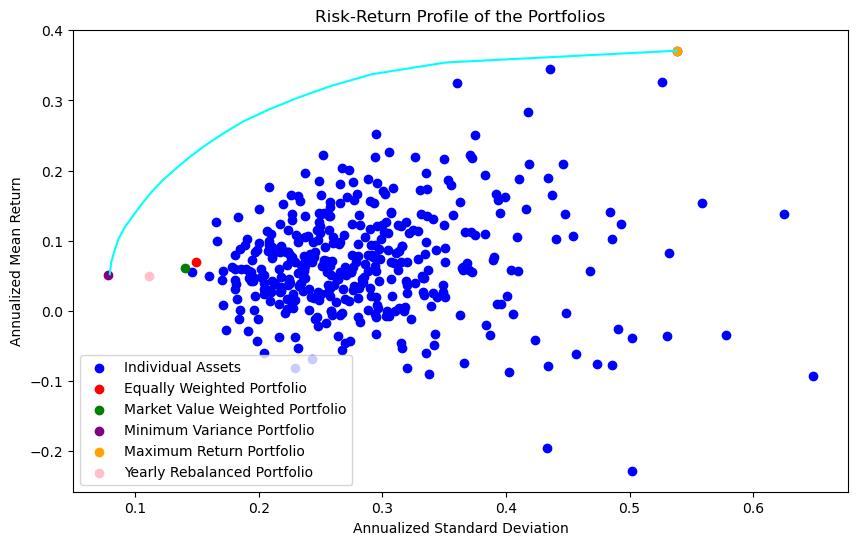

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(target_ann_std, target_ann_ret, color='cyan')
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance Portfolio')
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return Portfolio')
plt.scatter(reb_ann_std, reb_ann_ret, color='pink', label='Yearly Rebalanced Portfolio')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.show()

# Exercise 1, H2

In [96]:
escore_interest
'''escore_interest_reset = escore_interest.groupby('ISIN')['escore'].count().reset_index()
escore_interest_reset'''

escore_interest = escore_interest[escore_interest['ISIN'].isin(interest_companies)]
escore_interest.reset_index(drop=True, inplace=True)
escore_interest

,Name,ISIN,year,escore,Country,Region
0,77 BANK,JP3352000008,2013-01-01,15.25,JP,PAC
1,77 BANK,JP3352000008,2014-01-01,15.56,JP,PAC
2,77 BANK,JP3352000008,2015-01-01,18.65,JP,PAC
3,77 BANK,JP3352000008,2016-01-01,21.43,JP,PAC
4,77 BANK,JP3352000008,2017-01-01,22.29,JP,PAC
...,...,...,...,...,...,...
4494,YUEXIU PROPERTY COMPANY,HK0000745908,2019-01-01,85.79,HK,PAC
4495,YUEXIU PROPERTY COMPANY,HK0000745908,2020-01-01,83.72,HK,PAC
4496,YUEXIU PROPERTY COMPANY,HK0000745908,2021-01-01,80.73,HK,PAC
4497,YUEXIU PROPERTY COMPANY,HK0000745908,2022-01-01,76.96,HK,PAC


count    4499.000000
mean       56.802892
std        25.366311
min         0.000000
25%        40.075000
50%        61.730000
75%        77.210000
max        98.210000
Name: escore, dtype: float64


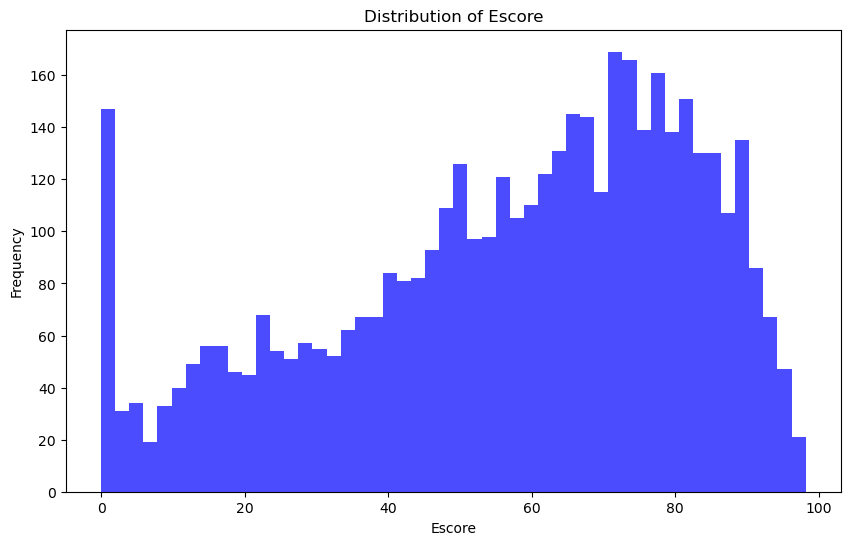

In [97]:
# Summary statistics
summary_stats = escore_interest['escore'].describe()
print(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(escore_interest['escore'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Escore')
plt.ylabel('Frequency')
plt.title('Distribution of Escore')
plt.show()


Summary Statistics for Year 2013-01-01 00:00:00:
count    409.000000
mean      46.373594
std       27.413422
min        0.000000
25%       22.460000
50%       49.360000
75%       69.220000
max       93.770000
Name: escore, dtype: float64

Summary Statistics for Year 2014-01-01 00:00:00:
count    409.000000
mean      47.251320
std       27.284042
min        0.000000
25%       24.020000
50%       50.100000
75%       70.050000
max       96.250000
Name: escore, dtype: float64

Summary Statistics for Year 2015-01-01 00:00:00:
count    409.000000
mean      49.710831
std       26.891091
min        0.000000
25%       28.550000
50%       53.410000
75%       72.310000
max       95.280000
Name: escore, dtype: float64

Summary Statistics for Year 2016-01-01 00:00:00:
count    409.000000
mean      52.625428
std       25.981752
min        0.000000
25%       32.850000
50%       57.220000
75%       74.010000
max       95.520000
Name: escore, dtype: float64

Summary Statistics for Year 2017-01-01 00:0

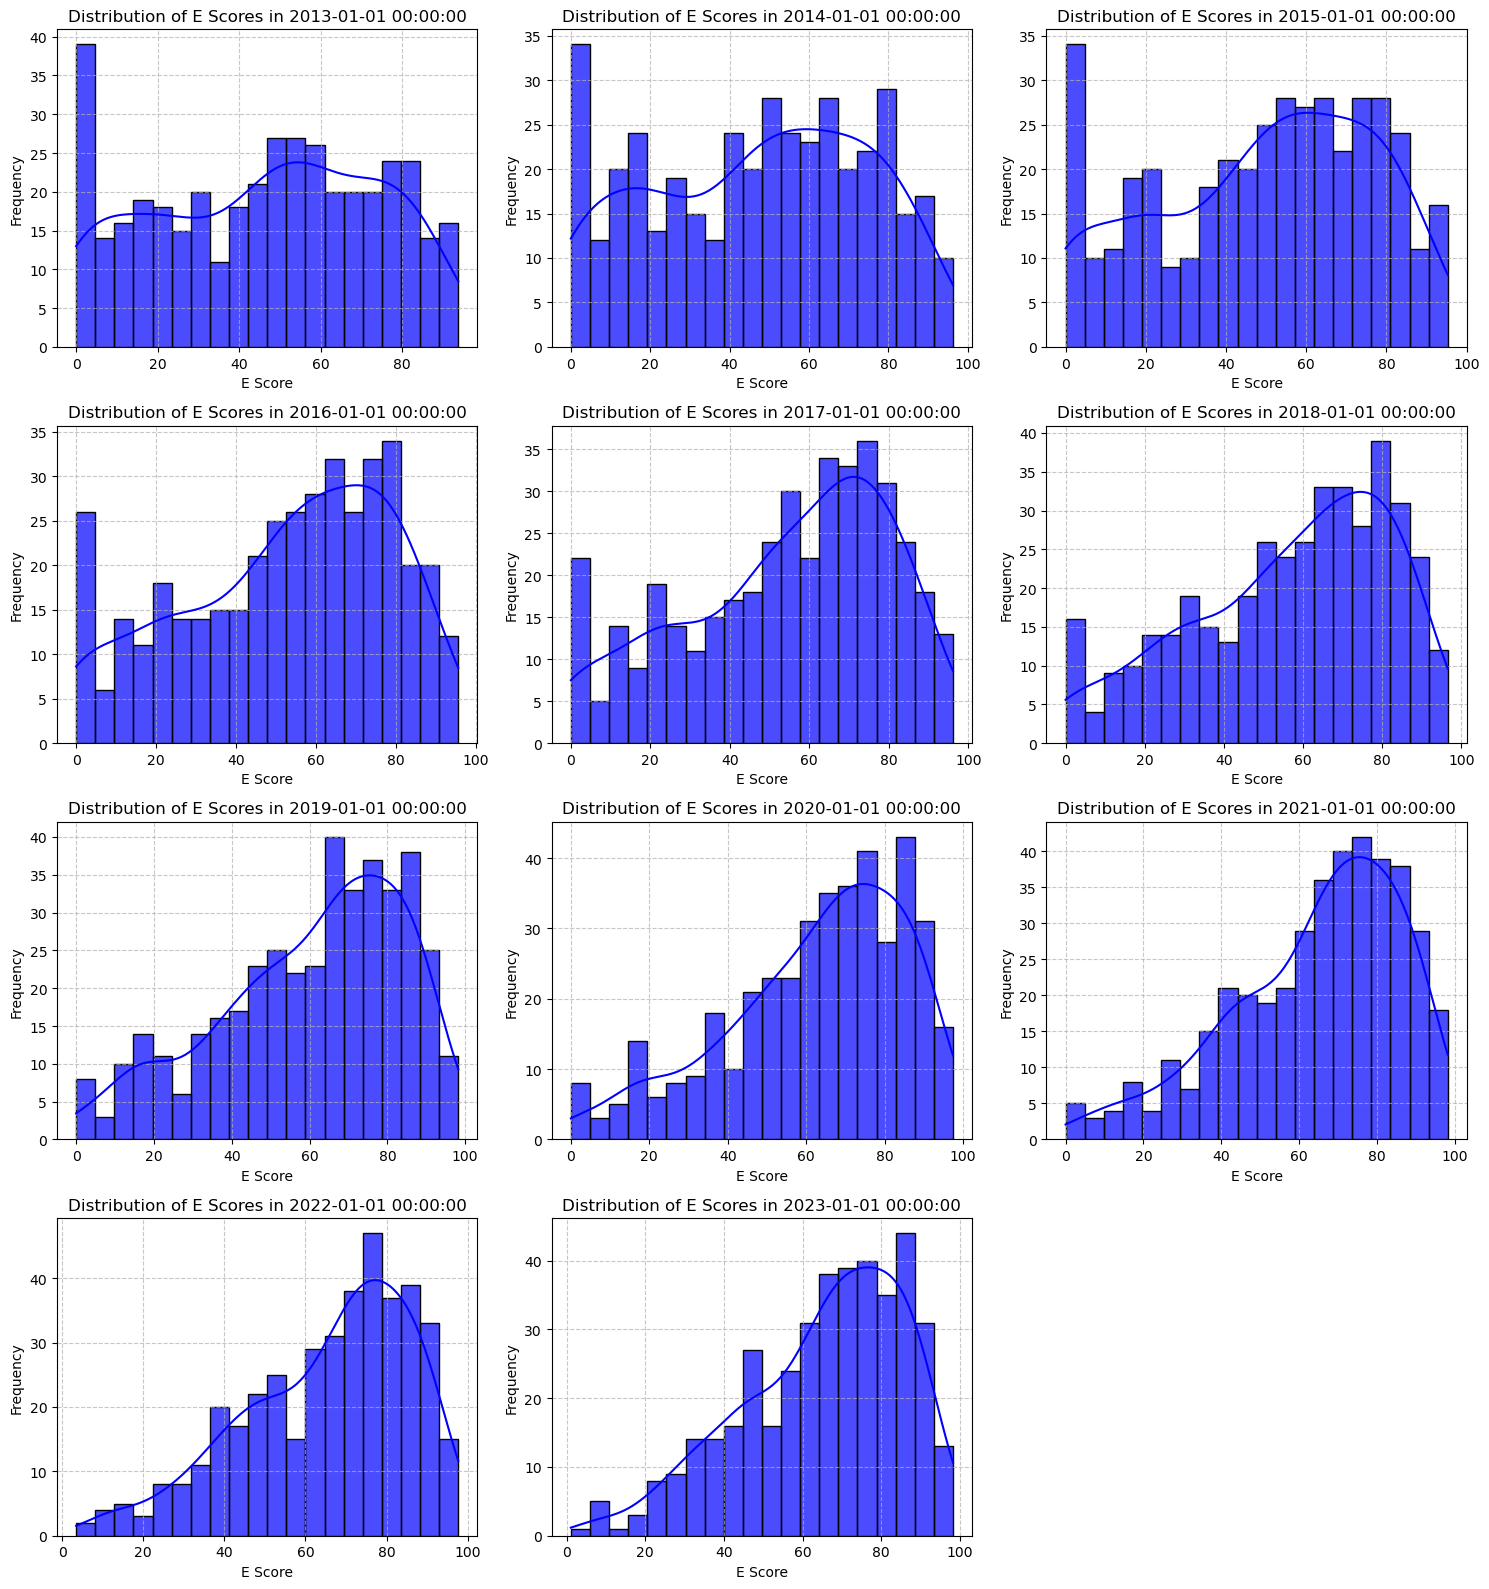

"# Option 3: Boxplot comparison across years for easy comparison\nplt.figure(figsize=(12, 6))\nsns.boxplot(x='year', y='escore', data=escore_interest)\nplt.title('Distribution of E Scores by Year')\nplt.xlabel('Year')\nplt.ylabel('E Score')\nplt.grid(True, linestyle='--', alpha=0.7)\nplt.tight_layout()\nplt.show()"

In [98]:

import seaborn as sns

# Group by year and calculate summary statistics
yearly_stats = []

for year in sorted(escore_interest['year'].unique()):
    year_data = escore_interest[escore_interest['year'] == year]['escore']
    stats = {
        'year': year,
        'Mean': year_data.mean(),
        'Median': year_data.median(),
        'Min': year_data.min(),
        'Max': year_data.max(),
        'StdDev': year_data.std(),
        'Count': year_data.count()
    }
    yearly_stats.append(stats)
    
    # Print summary stats for each year
    print(f"\nSummary Statistics for Year {year}:")
    print(year_data.describe())

yearly_stats_df = pd.DataFrame(yearly_stats)
print("\nYearly E Score Statistics Overview:")
print(yearly_stats_df)

# Create histograms for each year
# Option 1: Separate histograms for each year
years = sorted(escore_interest['year'].unique())
num_years = len(years)
cols = 3  # Number of columns in the grid
rows = (num_years + cols - 1) // cols  # Calculate needed rows

plt.figure(figsize=(15, 4 * rows))

for i, year in enumerate(years):
    year_data = escore_interest[escore_interest['year'] == year]['escore']
    
    plt.subplot(rows, cols, i + 1)
    sns.histplot(year_data, bins=20, kde=True, color='blue', alpha=0.7)
    plt.xlabel('E Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of E Scores in {year}')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

'''# Option 2: FacetGrid for a more compact visualization
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(escore_interest, col='year', col_wrap=3, height=3)
g.map(sns.histplot, 'escore', bins=20, kde=True)
g.set_axis_labels('E Score', 'Frequency')
g.set_titles('Year: {col_name}')
g.fig.suptitle('Distribution of E Scores by Year', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()'''

'''# Option 3: Boxplot comparison across years for easy comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='escore', data=escore_interest)
plt.title('Distribution of E Scores by Year')
plt.xlabel('Year')
plt.ylabel('E Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()'''

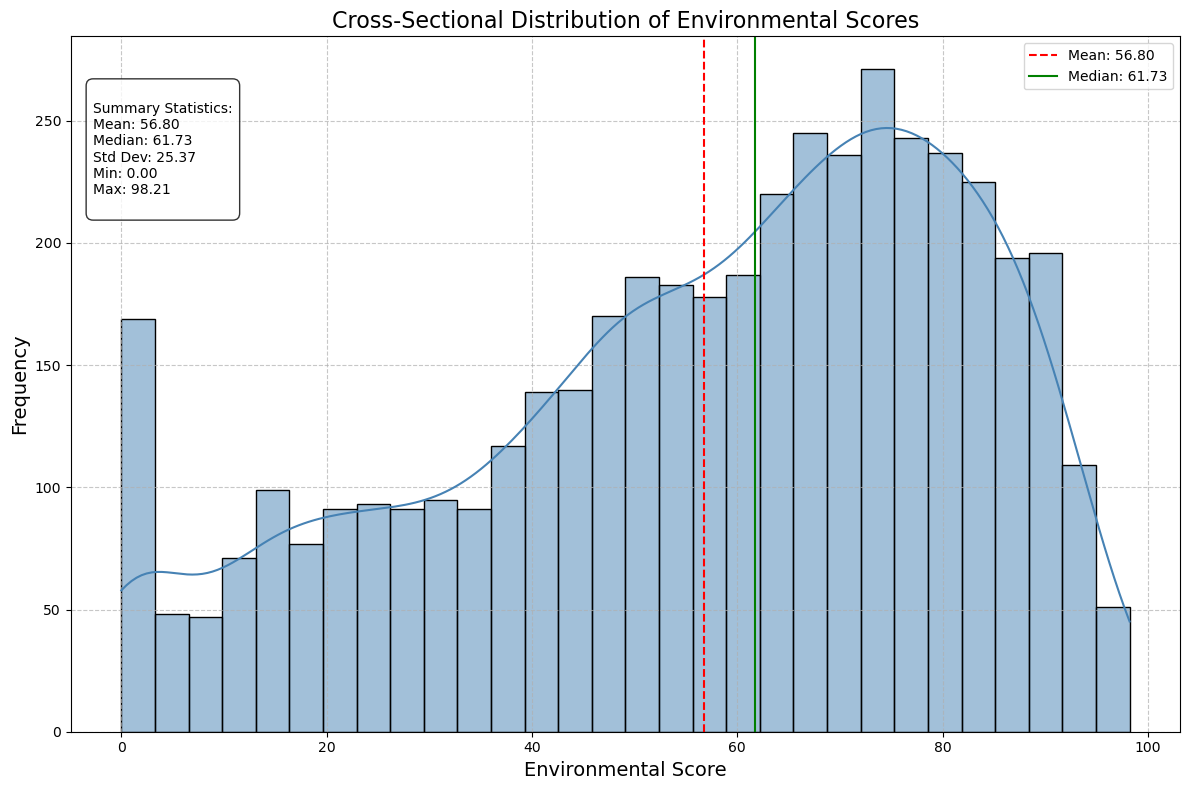

In [99]:
# Create a more detailed histogram of E-score distribution
plt.figure(figsize=(12, 8))

# Main histogram with KDE
ax = sns.histplot(escore_interest['escore'], bins=30, kde=True, color='steelblue')
plt.axvline(escore_interest['escore'].mean(), color='red', linestyle='--', 
            label=f'Mean: {escore_interest["escore"].mean():.2f}')
plt.axvline(escore_interest['escore'].median(), color='green', linestyle='-', 
            label=f'Median: {escore_interest["escore"].median():.2f}')

# Add annotations for key statistics
stats_text = f"""
Summary Statistics:
Mean: {escore_interest['escore'].mean():.2f}
Median: {escore_interest['escore'].median():.2f}
Std Dev: {escore_interest['escore'].std():.2f}
Min: {escore_interest['escore'].min():.2f}
Max: {escore_interest['escore'].max():.2f}
"""

plt.annotate(stats_text, xy=(0.02, 0.75), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

# Customize plot
plt.title('Cross-Sectional Distribution of Environmental Scores', fontsize=16)
plt.xlabel('Environmental Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# EXERCISE 2

Top 10 companies with lowest E-scores:
1. SQUARE ENIX HOLDINGS (ISIN: JP3164630000) - E-Score: 3.20
2. KEIO (ISIN: JP3277800003) - E-Score: 3.41
3. TAKASHIMAYA (ISIN: JP3456000003) - E-Score: 4.23
4. NIPPON TELEVISION HDG. (ISIN: JP3732200005) - E-Score: 5.38
5. SOUTHERN CROSS MEDIA GROUP (ISIN: AU000000SXL4) - E-Score: 5.59
6. DENA (ISIN: JP3548610009) - E-Score: 6.69
7. ODAKYU ELECTRIC RY. (ISIN: JP3196000008) - E-Score: 7.16
8. USS (ISIN: JP3944130008) - E-Score: 8.61
9. TBS HOLDINGS (ISIN: JP3588600001) - E-Score: 9.58
10. SANKYO (ISIN: JP3326410002) - E-Score: 10.31


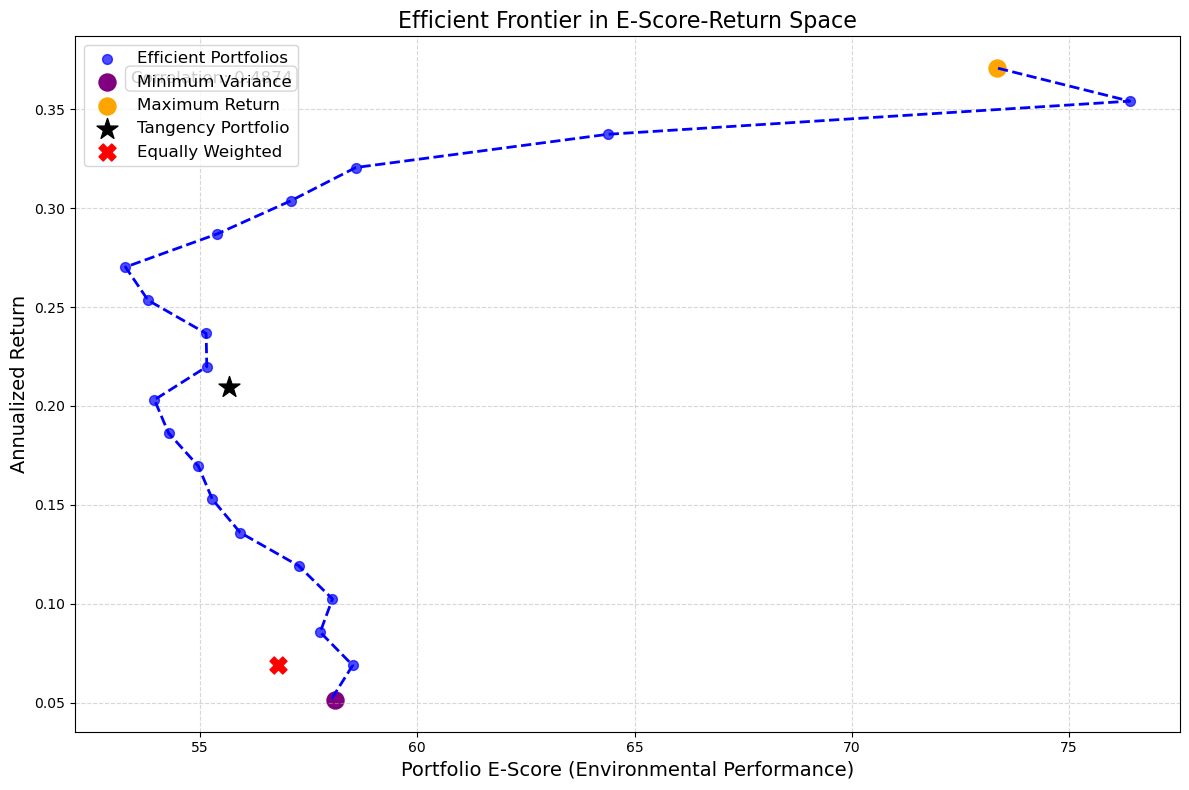

In [100]:
# Calculate weighted E-score for each point on the efficient frontier
# First, create a mapping between company names and their average E-scores
avg_escores = escore_interest.groupby(['Name', 'ISIN'])['escore'].mean().reset_index()

# Get companies in the order they appear in the covariance matrix
companies = cov_matrix.index.tolist()

# Map average E-scores to companies
company_escores = []
for company in companies:
    score = avg_escores[avg_escores['Name'] == company]['escore'].values
    if len(score) > 0:
        company_escores.append(score[0])
    else:
        company_escores.append(np.nan)

company_escores = np.array(company_escores)

# Calculate weighted E-scores for portfolios along the efficient frontier
portfolio_escores = []
for weights in efficient_frontier:
    weighted_escore = np.nansum(weights * company_escores)
    portfolio_escores.append(weighted_escore)

# Calculate E-scores for special portfolios
min_var_escore = np.nansum(min_variance_weights * company_escores)
max_ret_escore = np.nansum(max_return_weights * company_escores)
tan_escore = np.nansum(tan_weights * company_escores)
ew_escore = np.nanmean(company_escores)  # Equally weighted

# Create comprehensive plot of E-score vs return
plt.figure(figsize=(12, 8))

# Plot efficient frontier portfolios in E-score-return space
plt.scatter(portfolio_escores, target_ann_ret, color='blue', s=50, alpha=0.7, label='Efficient Portfolios')

# Plot special portfolios
plt.scatter(min_var_escore, minvar_ann_ret, color='purple', s=150, marker='o', label='Minimum Variance')
plt.scatter(max_ret_escore, maxr_ann_ret, color='orange', s=150, marker='o', label='Maximum Return')
plt.scatter(tan_escore, tan_ret, color='black', marker='*', s=250, label='Tangency Portfolio')
plt.scatter(ew_escore, ew_ann_ret, color='red', marker='X', s=150, label='Equally Weighted')

# Plot the efficient frontier in E-score-return space
plt.plot(portfolio_escores, target_ann_ret, 'b--', linewidth=2)

# Calculate correlation
corr = np.corrcoef(portfolio_escores, target_ann_ret)[0, 1]
plt.text(0.05, 0.95, f"Correlation: {corr:.4f}", transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Styling and labels
plt.xlabel('Portfolio E-Score (Environmental Performance)', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.title('Efficient Frontier in E-Score-Return Space', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Identify companies with lowest E-scores (optional section)
lowest_escores = avg_escores.sort_values('escore').head(10)
print("Top 10 companies with lowest E-scores:")
for i, (_, row) in enumerate(lowest_escores.iterrows()):
    print(f"{i+1}. {row['Name']} (ISIN: {row['ISIN']}) - E-Score: {row['escore']:.2f}")

plt.tight_layout()
plt.show()

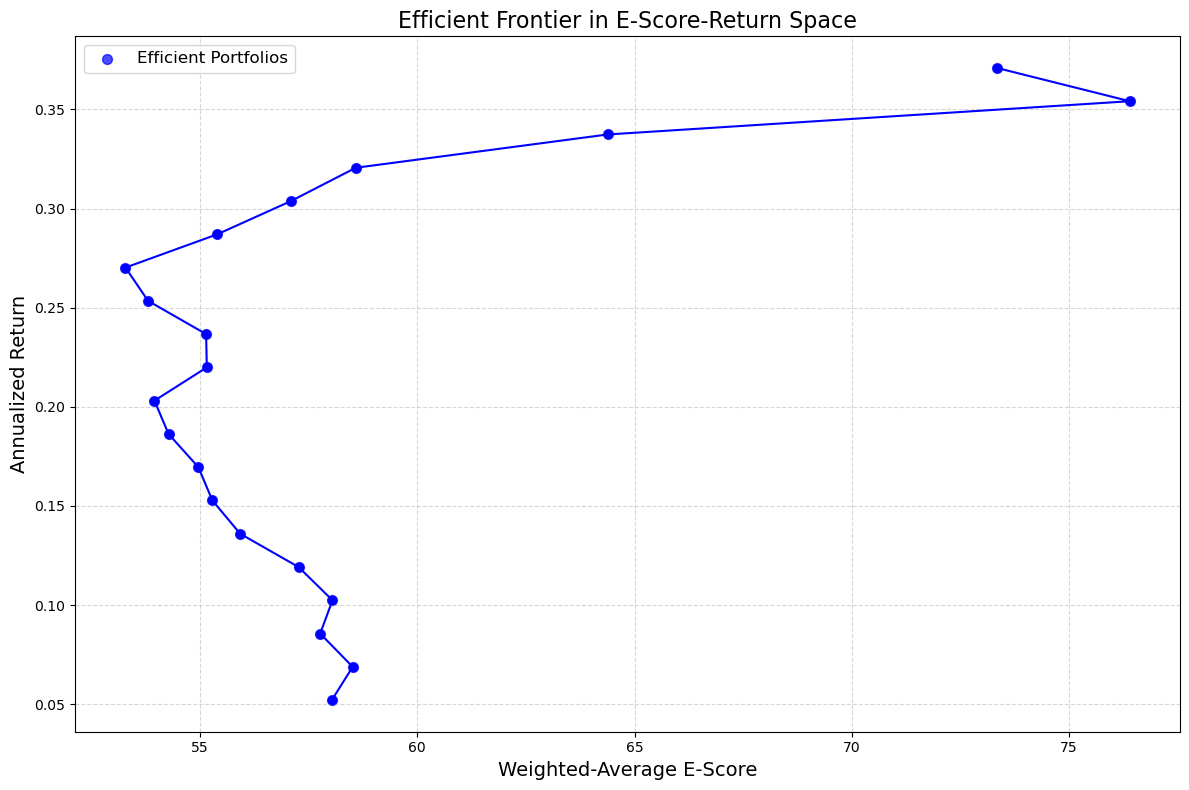

Top 10 firms driving the E-score down:
1. SQUARE ENIX HOLDINGS (ISIN: JP3164630000) - E-Score: 3.20
2. KEIO (ISIN: JP3277800003) - E-Score: 3.41
3. TAKASHIMAYA (ISIN: JP3456000003) - E-Score: 4.23
4. NIPPON TELEVISION HDG. (ISIN: JP3732200005) - E-Score: 5.38
5. SOUTHERN CROSS MEDIA GROUP (ISIN: AU000000SXL4) - E-Score: 5.59
6. DENA (ISIN: JP3548610009) - E-Score: 6.69
7. ODAKYU ELECTRIC RY. (ISIN: JP3196000008) - E-Score: 7.16
8. USS (ISIN: JP3944130008) - E-Score: 8.61
9. TBS HOLDINGS (ISIN: JP3588600001) - E-Score: 9.58
10. SANKYO (ISIN: JP3326410002) - E-Score: 10.31


In [101]:
# Calculate the average E-score for each company
avg_escores = escore_interest.groupby(['Name', 'ISIN'])['escore'].mean().reset_index()

# Get company names in the same order as the covariance matrix used for optimization
companies = cov_matrix.index.tolist()

# Map average E-scores to companies in the right order
company_escores = []
for company in companies:
    score = avg_escores[avg_escores['Name'] == company]['escore'].values
    if len(score) > 0:
        company_escores.append(score[0])
    else:
        company_escores.append(np.nan)

company_escores = np.array(company_escores)

# Calculate weighted E-scores for portfolios along the efficient frontier
portfolio_escores = []
for weights in efficient_frontier:
    weighted_escore = np.nansum(weights * company_escores)
    portfolio_escores.append(weighted_escore)

'''# Calculate E-scores for special portfolios
min_var_escore = np.nansum(min_variance_weights * company_escores)
max_ret_escore = np.nansum(max_return_weights * company_escores)
tan_escore = np.nansum(tan_weights * company_escores)
ew_escore = np.nanmean(company_escores)  # Equally weighted portfolio'''

# Plot portfolios in E-score-return space
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_escores, target_ann_ret, color='blue', s=50, alpha=0.7, label='Efficient Portfolios')

'''# Plot special portfolios
plt.scatter(min_var_escore, minvar_ann_ret, color='purple', s=100, label='Minimum Variance')
plt.scatter(max_ret_escore, maxr_ann_ret, color='orange', s=100, label='Maximum Return')
plt.scatter(tan_escore, tan_ret, color='black', marker='*', s=200, label='Tangency')
plt.scatter(ew_escore, ew_ann_ret, color='red', marker='X', s=100, label='Equally Weighted')'''


'''# Calculate correlation
corr = np.corrcoef(portfolio_escores, target_ann_ret)[0, 1]
plt.text(0.05, 0.95, f"Correlation: {corr:.4f}", transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))'''
#plt.figure(figsize=(10, 6))
plt.plot(portfolio_escores, target_ann_ret, marker='o', linestyle='-', color='blue')
plt.xlabel('Weighted-Average E-Score', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.title('Efficient Frontier in E-Score-Return Space', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Identify companies with lowest E-scores
lowest_escores = avg_escores.sort_values('escore').head(10)
print("Top 10 firms driving the E-score down:")
for i, (_, row) in enumerate(lowest_escores.iterrows()):
    print(f"{i+1}. {row['Name']} (ISIN: {row['ISIN']}) - E-Score: {row['escore']:.2f}")

# EXERCISE 3

In [102]:
# Merge using closest past escore value
dfh2_ex3_opt = pd.merge_asof(
    df_ex4.sort_values('year'),               # Left DataFrame (sorted by year)
    melted_escore.sort_values('year'),        # Right DataFrame (sorted by year)
    on='year',                                # Time-based column to merge on
    by=['Name', 'ISIN'],                      # Additional columns that must match exactly
    direction='backward'                      # Take the closest previous score

)
dfh2_ex3_opt.head()

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return,escore
0,77 BANK,JP3352000008,2004-01-30,0.66,JP,PAC,-0.057143,NaN
1,COCHLEAR,AU000000COH5,2004-01-30,670.23,AU,PAC,0.038649,0.00
2,SUMITOMO HEAVY INDS.,JP3405400007,2004-01-30,1.96,JP,PAC,0.020833,0.00
3,COMFORTDELGRO CORPORATION,SG1N31909426,2004-01-30,69.31,SG,PAC,0.124980,0.00
4,SUMITOMO CHEMICAL,JP3401400001,2004-01-30,4.78,JP,PAC,0.004202,66.31


In [103]:
dfh2_ex3_opt.loc[dfh2_ex3_opt['escore'].isna(), 'escore'] = 0.
dfh2_ex3_opt['year_only'] = dfh2_ex3_opt['year'].dt.year

In [104]:
actual_timeframe = dfh2_ex3_opt[dfh2_ex3_opt['year'] <= '2024-01-01']
actual_timeframe.sort_values(['Name', 'year']).head(3)

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return,escore,year_only
0,77 BANK,JP3352000008,2004-01-30,0.66,JP,PAC,-0.057143,0.0,2004
440,77 BANK,JP3352000008,2004-02-27,0.68,JP,PAC,0.030303,0.0,2004
881,77 BANK,JP3352000008,2004-03-31,0.78,JP,PAC,0.147059,0.0,2004


In [105]:
df_escore = actual_timeframe.groupby(['Name','year_only'])['escore'].mean().reset_index()
df_escore.tail(2)

,Name,year_only,escore
8178,YUEXIU PROPERTY COMPANY,2022,76.96
8179,YUEXIU PROPERTY COMPANY,2023,81.68


In [106]:
e_scores = df_escore[df_escore['year_only'] == int('2013')-1]['escore'].values
len(e_scores)
dfh2_ex3_opt

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return,escore,year_only
0,77 BANK,JP3352000008,2004-01-30,0.66,JP,PAC,-0.057143,0.00,2004
1,COCHLEAR,AU000000COH5,2004-01-30,670.23,AU,PAC,0.038649,0.00,2004
2,SUMITOMO HEAVY INDS.,JP3405400007,2004-01-30,1.96,JP,PAC,0.020833,0.00,2004
3,COMFORTDELGRO CORPORATION,SG1N31909426,2004-01-30,69.31,SG,PAC,0.124980,0.00,2004
4,SUMITOMO CHEMICAL,JP3401400001,2004-01-30,4.78,JP,PAC,0.004202,66.31,2004
...,...,...,...,...,...,...,...,...,...
103063,TAKARA HDG.,JP3459600007,2024-12-31,15.47,JP,PAC,0.005852,70.40,2024
103064,NOK,JP3164800009,2024-12-31,26.13,JP,PAC,0.053204,61.95,2024
103065,ISUZU MOTORS,JP3137200006,2024-12-31,6.66,JP,PAC,0.032558,91.51,2024
103066,CHIBA BANK,JP3511800009,2024-12-31,10.27,JP,PAC,-0.065514,59.63,2024


# firms to exclude

In [107]:
weights_gmv = []  # Stores original minimum variance portfolio weights
weights_improved = []  # Stores E-score improved portfolio weights
original_scores = []  # Stores E-scores of original portfolios
improved_scores = []  # Stores E-scores of improved portfolios

for time in ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']:
    actual_timeframe = dfh2_ex3_opt[dfh2_ex3_opt['year'] <= f'{time}-01-01']
    
    # Get E-scores for current year
    df_escore = actual_timeframe.groupby(['Name','year_only'])['escore'].mean().reset_index()
    e_scores = df_escore[df_escore['year_only'] == int(time)-1]['escore'].values
    
    if e_scores.size == 0:
        print(f"Warning: E-scores are empty for year {time}. Skipping this year.")
        continue
    
    # Calculate covariance matrix and set optimization parameters
    cov_matrix = actual_timeframe.pivot(index='year', columns='Name', values='pct_monthly_return').cov()
    num_assets = len(cov_matrix)
    bounds = tuple((0, 1) for _ in range(num_assets))
    init_guess = num_assets * [1. / num_assets]
    
    # STEP 1: Calculate the original minimum variance portfolio
    constraints_gmv = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Weights sum to 1
    )
    
    result_gmv = minimize(portfolio_variance, init_guess, args=(cov_matrix,), 
                         method='SLSQP', bounds=bounds, constraints=constraints_gmv)
    
    gmv_weights = result_gmv.x
    weights_gmv.append(gmv_weights)
    
    # Calculate the E-score of the minimum variance portfolio
    gmv_escore = np.dot(gmv_weights, e_scores)
    original_scores.append(gmv_escore)
    
    # STEP 2: Create the improved portfolio with 20% higher E-score
    target_escore = 1.2 * gmv_escore
    
    constraints_improved = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Weights sum to 1
        {'type': 'ineq', 'fun': lambda x: np.dot(x, e_scores) - target_escore}  # E-score constraint
    )
    
    result_improved = minimize(portfolio_variance, init_guess, args=(cov_matrix,), 
                              method='SLSQP', bounds=bounds, constraints=constraints_improved)
    
    improved_weights = result_improved.x
    weights_improved.append(improved_weights)
    
    # Calculate the E-score of the improved portfolio
    improved_escore = np.dot(improved_weights, e_scores)
    improved_scores.append(improved_escore)
    
    print(f"Year {time}:")
    print(f"  Original GMV E-score: {gmv_escore:.4f}")
    print(f"  Improved GMV E-score: {improved_escore:.4f}")
    print(f"  Improvement: {(improved_escore/gmv_escore - 1)*100:.2f}%")
    
    # For the most recent year, analyze which firms were excluded
    if time == '2024':
        # Identify companies that were significantly reduced or excluded
        weight_changes = improved_weights - gmv_weights
        
        # Create a DataFrame to analyze the changes
        changes_df = pd.DataFrame({
            'Name': cov_matrix.columns,
            'Original_Weight': gmv_weights,
            'Improved_Weight': improved_weights,
            'Weight_Change': weight_changes,
            'E_Score': e_scores
        })
        
        # Sort by weight change to see biggest reductions
        excluded_firms = changes_df[changes_df['Improved_Weight'] < 0.005].sort_values('Original_Weight', ascending=False)
        
        print("\nFirms excluded or significantly reduced in the improved portfolio:")
        print(excluded_firms[['Name', 'Original_Weight', 'Improved_Weight', 'E_Score']])
        
        # Sort by weight increase to see which firms gained weight
        increased_firms = changes_df[changes_df['Weight_Change'] > 0.01].sort_values('Weight_Change', ascending=False)
        
        print("\nFirms with increased weight in the improved portfolio:")
        print(increased_firms[['Name', 'Original_Weight', 'Improved_Weight', 'E_Score']])

Year 2014:
  Original GMV E-score: 46.3943
  Improved GMV E-score: 55.6732
  Improvement: 20.00%
Year 2015:
  Original GMV E-score: 48.6167
  Improved GMV E-score: 58.3400
  Improvement: 20.00%
Year 2016:
  Original GMV E-score: 50.6791
  Improved GMV E-score: 60.8150
  Improvement: 20.00%
Year 2017:
  Original GMV E-score: 54.6239
  Improved GMV E-score: 65.5487
  Improvement: 20.00%
Year 2018:
  Original GMV E-score: 52.0176
  Improved GMV E-score: 62.4212
  Improvement: 20.00%
Year 2019:
  Original GMV E-score: 55.8313
  Improved GMV E-score: 66.9976
  Improvement: 20.00%
Year 2020:
  Original GMV E-score: 57.4800
  Improved GMV E-score: 68.9760
  Improvement: 20.00%
Year 2021:
  Original GMV E-score: 63.4930
  Improved GMV E-score: 76.1917
  Improvement: 20.00%
Year 2022:
  Original GMV E-score: 65.3615
  Improved GMV E-score: 78.4338
  Improvement: 20.00%
Year 2023:
  Original GMV E-score: 67.6347
  Improved GMV E-score: 81.1616
  Improvement: 20.00%
Year 2024:
  Original GMV E-sc

In [242]:
dfh2_ex3_opt_w = dfh2_ex3_opt[dfh2_ex3_opt['year_only'] >=2014]

In [243]:
# Create a DataFrame for improved_weights with company names and weights
weights_df = pd.DataFrame({
	'Name': cov_matrix.columns,  # Ensure this matches the company names in dfh2_ex3_opt_w
	'weights': improved_weights
})

# Merge the weights into the main DataFrame based on the company names
dfh2_ex3_opt_w = dfh2_ex3_opt_w.merge(weights_df, on='Name', how='left')

In [244]:
dfh2_ex3_opt_w['w_return'] = dfh2_ex3_opt_w['weights'] * dfh2_ex3_opt_w['pct_monthly_return']

In [245]:
dfh2_ex3_opt_w[dfh2_ex3_opt_w['pct_monthly_return'].isna()].head()

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return,escore,year_only,weights,w_return
47884,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-10-31,NaN,JP,PAC,NaN,63.93,2023,2.727039e-18,NaN
48543,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-11-30,NaN,JP,PAC,NaN,63.93,2023,2.727039e-18,NaN
48752,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-12-29,NaN,JP,PAC,NaN,63.93,2023,2.727039e-18,NaN
49185,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2024-01-31,NaN,JP,PAC,NaN,63.93,2024,2.727039e-18,NaN
49432,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2024-01-31,NaN,JP,PAC,NaN,89.52,2024,1.084355e-02,NaN


In [253]:
w_return = dfh2_ex3_opt_w.groupby('year')['w_return'].sum().reset_index()
w_return['year_only'] = pd.to_datetime(w_return['year']).dt.year
w_return = w_return.groupby('year_only')['w_return'].mean().reset_index()
w_return['ann_w_return'] = w_return['w_return'] * 12
mean_ex3 = w_return['ann_w_return'].mean()

In [254]:
w_return

,year_only,w_return,ann_w_return
0,2014,0.008137,0.097648
1,2015,0.011167,0.134007
2,2016,0.002556,0.030666
3,2017,0.011039,0.132468
4,2018,-0.000831,-0.009974
5,2019,0.004945,0.059342
6,2020,-0.001282,-0.015389
7,2021,0.006457,0.077485
8,2022,-0.007915,-0.094985
9,2023,0.012951,0.155407


In [255]:
'''w_return = dfh2_ex3_opt_w
w_return['year_only'] = pd.to_datetime(w_return['year']).dt.year
#w_return = dfh2_ex3_opt_w.groupby('year')['w_return'].sum().reset_index()
w_return.groupby('year_only')['w_return'].sum().reset_index()
w_return['ann_w_return'] = w_return['w_return'] * 12
mean_ex3 = w_return['ann_w_return'].mean()'''

"w_return = dfh2_ex3_opt_w\nw_return['year_only'] = pd.to_datetime(w_return['year']).dt.year\n#w_return = dfh2_ex3_opt_w.groupby('year')['w_return'].sum().reset_index()\nw_return.groupby('year_only')['w_return'].sum().reset_index()\nw_return['ann_w_return'] = w_return['w_return'] * 12\nmean_ex3 = w_return['ann_w_return'].mean()"

In [256]:
std_ex3 = w_return['w_return'].std() * np.sqrt(12)

In [257]:
sharpe_ex3 = (mean_ex3 - ann_rf) / std_ex3

In [258]:
print(f"Mean: {mean_ex3:.4f}")
print(f"Standard Deviation: {std_ex3:.4f}")
print(f"Sharpe Ratio: {sharpe_ex3:.4f}")

Mean: 0.0537
Standard Deviation: 0.0220
Sharpe Ratio: 1.9164


In [108]:

data = {
    "Name": [
        "CLP HOLDINGS", "HANG SENG BANK", "TOYOTA MOTOR", "OSAKA GAS", 
        "ANA HOLDINGS", "AJINOMOTO", "SINGAPORE TECHS.ENGR.", "ONO PHARM.", 
        "NIPPON TELG. & TEL.", "FUJIFILM HOLDINGS", "OTSUKA HOLDINGS", 
        "BENESSE HOLDINGS DEAD - DELIST.17/05/24", "KANSAI ELECTRIC PWR."
    ],
    "Original_Weight": [
        1.372660e-01, 3.928759e-02, 8.561730e-03, 4.648515e-02, 
        1.005394e-02, 3.134103e-02, 0.000000e+00, 9.793899e-20, 
        1.558477e-02, 2.206871e-02, 1.357796e-02, 6.255917e-05, 
        5.817885e-05
    ],
    "Improved_Weight": [
        0.220007, 0.075687, 0.041136, 0.074573, 
        0.035560, 0.056690, 0.024205, 0.020265, 
        0.035847, 0.040040, 0.027157, 0.011230, 
        0.010119
    ],
    "E_Score": [
        88.22, 89.59, 88.84, 69.89, 
        79.14, 82.42, 86.23, 91.14, 
        81.81, 81.25, 81.91, 84.54, 
        76.03
    ]
}

firms_increased_weight_df = pd.DataFrame(data)
firms_increased_weight_df

,Name,Original_Weight,Improved_Weight,E_Score
0,CLP HOLDINGS,1.372660e-01,0.220007,88.22
1,HANG SENG BANK,3.928759e-02,0.075687,89.59
2,TOYOTA MOTOR,8.561730e-03,0.041136,88.84
3,OSAKA GAS,4.648515e-02,0.074573,69.89
4,ANA HOLDINGS,1.005394e-02,0.035560,79.14
5,AJINOMOTO,3.134103e-02,0.056690,82.42
6,SINGAPORE TECHS.ENGR.,0.000000e+00,0.024205,86.23
7,ONO PHARM.,9.793899e-20,0.020265,91.14
8,NIPPON TELG. & TEL.,1.558477e-02,0.035847,81.81
9,FUJIFILM HOLDINGS,2.206871e-02,0.040040,81.25


Comparison of ESG Scores Between GMV and E-Improved Portfolios:


,Year,GMV E Score,Optimized E Score,Improvement,Improvement %
0,2014,46.3943,55.6732,9.2789,20.00%
1,2015,48.6167,58.3400,9.7233,20.00%
2,2016,50.6791,60.8150,10.1358,20.00%
3,2017,54.6239,65.5487,10.9248,20.00%
4,2018,52.0176,62.4212,10.4035,20.00%
5,2019,55.8313,66.9976,11.1663,20.00%
6,2020,57.4800,68.9760,11.4960,20.00%
7,2021,63.4930,76.1917,12.6986,20.00%
8,2022,65.3615,78.4338,13.0723,20.00%
9,2023,67.6347,81.1616,13.5269,20.00%


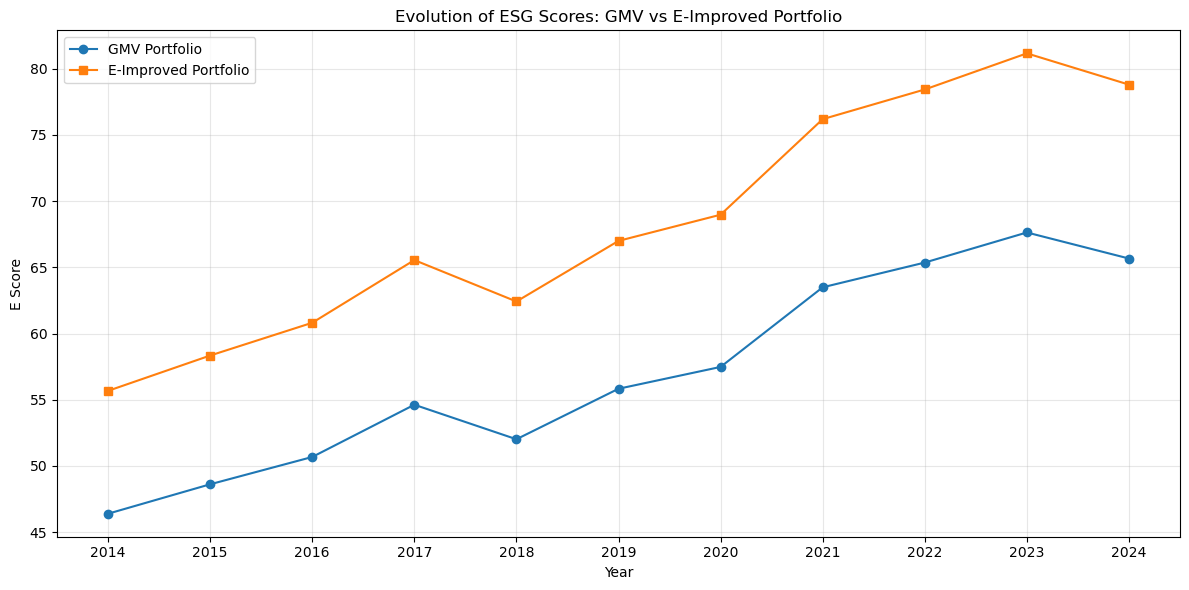

In [109]:


# Convert years to integers for the comparison DataFrame
years = [int(y) for y in ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'] 
         if f"Warning: E-scores are empty for year {y}" not in locals()]

# Create DataFrames for each portfolio's ESG scores
gmv_esg_df = pd.DataFrame({
    'Year': years[:len(original_scores)],
    'GMV E Score': original_scores
})

optimized_esg_df = pd.DataFrame({
    'Year': years[:len(improved_scores)],
    'Optimized E Score': improved_scores
})

# Display comparison of ESG scores
comparison_df = pd.merge(gmv_esg_df, optimized_esg_df, on='Year')
comparison_df['Improvement'] = comparison_df['Optimized E Score'] - comparison_df['GMV E Score']
comparison_df['Improvement %'] = (comparison_df['Improvement'] / comparison_df['GMV E Score']) * 100

# Format the dataframe for better display
formatted_df = comparison_df.copy()
formatted_df['GMV E Score'] = formatted_df['GMV E Score'].map('{:.4f}'.format)
formatted_df['Optimized E Score'] = formatted_df['Optimized E Score'].map('{:.4f}'.format)
formatted_df['Improvement'] = formatted_df['Improvement'].map('{:.4f}'.format)
formatted_df['Improvement %'] = formatted_df['Improvement %'].map('{:.2f}%'.format)

print("Comparison of ESG Scores Between GMV and E-Improved Portfolios:")
display(formatted_df)

# Create a visualization of the ESG scores over time
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Year'], comparison_df['GMV E Score'], marker='o', label='GMV Portfolio')
plt.plot(comparison_df['Year'], comparison_df['Optimized E Score'], marker='s', label='E-Improved Portfolio')

plt.xlabel('Year')
plt.ylabel('E Score')
plt.title('Evolution of ESG Scores: GMV vs E-Improved Portfolio')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(comparison_df['Year'])
plt.tight_layout()
plt.show()





In [110]:
print(excluded_firms[['Name', 'Original_Weight', 'Improved_Weight', 'E_Score']].head(30).reset_index(drop=True))

                              Name  Original_Weight  Improved_Weight  E_Score
0                      WACOAL HDG.     4.580649e-02     0.000000e+00    40.97
1                     CKI HOLDINGS     3.620368e-02     0.000000e+00    32.69
2              KINTETSU GROUP HDG.     3.514917e-02     1.714231e-18    39.67
3            JARDINE MATHESON HDG.     2.094391e-02     0.000000e+00    27.10
4          HONG KONG AND CHINA GAS     1.651218e-02     9.974660e-18    68.08
5                    CITIZEN WATCH     1.639042e-02     0.000000e+00    55.09
6                             KDDI     1.632907e-02     0.000000e+00    63.84
7                          METCASH     1.393211e-02     0.000000e+00    43.02
8                          NITERRA     1.217230e-02     5.295230e-19    46.80
9                        UNI CHARM     1.149378e-02     5.481119e-04    63.21
10                          KINDEN     1.064390e-02     3.426914e-18    53.50
11       DFI RETAIL GROUP HOLDINGS     8.545048e-03     1.170938

#the firms to delete are the ones above 

# EXERCISE 4 

In [235]:
# Function to optimize portfolio with tracking error minimization and ESG constraint
def optimize_tracking_error_with_esg(returns_data, market_values, escore_data, year):
    """
    Construct a portfolio that minimizes tracking error vs benchmark while meeting ESG target
    """
    # Get market cap weights for benchmark
    benchmark_weights = market_values / market_values.sum()
    
    # Calculate benchmark ESG score
    benchmark_escore = np.sum(benchmark_weights * escore_data)
    target_escore = benchmark_escore * 1.2  
    # 20% improvement
    
    # Get covariance matrix for tracking error calculation
    cov_matrix = returns_data.cov()
    
    # Define objective function: squared tracking error
    def squared_tracking_error(weights):
        weight_diff = weights - benchmark_weights
        return np.dot(weight_diff, np.dot(cov_matrix, weight_diff))
    
    # Prepare constraints
    num_assets = len(benchmark_weights)
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights = 1
        {'type': 'ineq', 'fun': lambda x: np.dot(x, escore_data) - target_escore}  # ESG score >= target
    ]
    
    # Non-negative weights
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    # Minimize tracking error
    result = minimize(
        squared_tracking_error, 
        benchmark_weights,
        method='SLSQP',
        bounds=bounds, 
        constraints=constraints
    )
    
    return {
        'weights': result.x,
        'benchmark_weights': benchmark_weights,
        'benchmark_escore': benchmark_escore,
        'target_escore': target_escore,
        'portfolio_escore': np.dot(result.x, escore_data),
        'tracking_error': np.sqrt(result.fun)
    }

# Storage for results
te_esg_monthly_returns = []
te_esg_weights = {}
benchmark_escores = {}
portfolio_escores = {}
tracking_errors = {}

# Implement the strategy year by year
for year in range(2013, 2024):
    print(f"Optimizing portfolio for {year}...")
    
    # Filter data for previous year (to calculate weights)
    prev_year = year - 1
    prev_year_data = df_ex3[df_ex3['year'].dt.year == prev_year]
    
    # Get month-end market values and E-scores
    prev_year_end = prev_year_data[prev_year_data['year'].dt.month == 12]
    
    # Get returns data for covariance estimation
    returns_matrix = prev_year_data.pivot(index='year', columns='Name', values='pct_monthly_return')
    
    # Get market values and E-scores
    market_values = prev_year_end.groupby('Name')['monthly_market_value'].mean()
    escores = prev_year_end.groupby('Name')['escore'].mean()
    
    # Make sure all series align
    common_companies = list(set(market_values.index) & set(escores.index) & set(returns_matrix.columns))
    
    market_values = market_values[common_companies]
    escores = escores[common_companies]
    returns_matrix = returns_matrix[common_companies]
    
    # Optimize portfolio
    try:
        result = optimize_tracking_error_with_esg(
            returns_matrix,
            market_values,
            escores.values,
            year
        )
        
        # Store results
        te_esg_weights[year] = pd.Series(result['weights'], index=common_companies)
        benchmark_escores[year] = result['benchmark_escore']
        portfolio_escores[year] = result['portfolio_escore']
        tracking_errors[year] = result['tracking_error']
        
        print(f"  Benchmark E-score: {result['benchmark_escore']:.2f}")
        print(f"  Portfolio E-score: {result['portfolio_escore']:.2f}")
        print(f"  Improvement: {((result['portfolio_escore']/result['benchmark_escore'])-1):.2%}")
        print(f"  Tracking error: {result['tracking_error']:.4f}")
        
        # Calculate monthly returns for current year
        current_year_data = df_ex3[df_ex3['year'].dt.year == year]
        monthly_returns = current_year_data.pivot(index='year', columns='Name', values='pct_monthly_return')
        
        weights = pd.Series(result['weights'], index=common_companies)
        
        # Calculate portfolio returns for each month
        for date, row in monthly_returns.iterrows():
            # Get available companies for this month
            available = list(set(weights.index) & set(row.dropna().index))
            if len(available) > 0:
                # Re-normalize weights to available companies
                month_weights = weights[available]
                month_weights = month_weights / month_weights.sum()
                
                # Calculate return
                month_return = np.sum(month_weights * row[available])
                te_esg_monthly_returns.append((date, month_return))
                
    except Exception as e:
        print(f"  Error optimizing for {year}: {str(e)}")

# Convert returns to Series
te_esg_returns = pd.Series(dict(sorted(te_esg_monthly_returns)))

# Calculate performance metrics
te_esg_ann_ret = te_esg_returns.mean() * 12
te_esg_ann_std = te_esg_returns.std() * np.sqrt(12)
te_esg_sharpe = (te_esg_ann_ret - ann_rf) / te_esg_ann_std
te_esg_cum_returns = (1 + te_esg_returns).cumprod() - 1



Optimizing portfolio for 2013...
  Error optimizing for 2013: not enough values to unpack (expected 2, got 0)
Optimizing portfolio for 2014...
  Error optimizing for 2014: not enough values to unpack (expected 2, got 0)
Optimizing portfolio for 2015...
  Benchmark E-score: 60.81
  Portfolio E-score: 72.97
  Improvement: 20.00%
  Tracking error: 0.0008
Optimizing portfolio for 2016...
  Benchmark E-score: 62.47
  Portfolio E-score: 74.96
  Improvement: 20.00%
  Tracking error: 0.0008
Optimizing portfolio for 2017...
  Benchmark E-score: 64.54
  Portfolio E-score: 77.45
  Improvement: 20.00%
  Tracking error: 0.0006
Optimizing portfolio for 2018...
  Benchmark E-score: 65.54
  Portfolio E-score: 78.64
  Improvement: 20.00%
  Tracking error: 0.0010
Optimizing portfolio for 2019...
  Benchmark E-score: 66.69
  Portfolio E-score: 80.03
  Improvement: 20.00%
  Tracking error: 0.0010
Optimizing portfolio for 2020...
  Benchmark E-score: 68.94
  Portfolio E-score: 82.73
  Improvement: 20.00%
 

In [151]:
te_esg_returns

2015-01-30    0.015976
2015-02-27    0.054534
2015-03-31    0.006006
2015-04-30    0.041779
2015-05-29    0.003162
                ...   
2023-08-31   -0.035942
2023-09-29   -0.011968
2023-10-31   -0.061237
2023-11-30    0.076796
2023-12-29    0.032257
Length: 108, dtype: float64

In [184]:
te_esg_cum_returns

2015-01-30    0.015976
2015-02-27    0.071382
2015-03-31    0.077816
2015-04-30    0.122846
2015-05-29    0.126396
                ...   
2023-08-31    0.564441
2023-09-29    0.545719
2023-10-31    0.451064
2023-11-30    0.562499
2023-12-29    0.612901
Length: 108, dtype: float64

In [112]:
# Calculate average E-scores for each portfolio type
avg_te_esg_escore = np.mean(list(portfolio_escores.values()))

# Calculate equal-weighted portfolio average E-score
ew_escores_by_year = []
# Calculate market-weighted portfolio average E-score
mw_escores_by_year = []

for year in te_esg_weights.keys():
    # Equal-weighted - calculate simple average of E-scores
    prev_year = year - 1
    prev_year_data = df_ex3[df_ex3['year'].dt.year == prev_year]
    prev_year_end = prev_year_data.sort_values('year').groupby('Name').last().reset_index()
    escores = prev_year_end['escore'].values
    if len(escores) > 0:
        ew_escores_by_year.append(np.mean(escores))
    
    # Market-weighted - use the benchmark E-scores we already calculated
    if year in benchmark_escores:
        mw_escores_by_year.append(benchmark_escores[year])

# Calculate average across years
ew_avg_escore = np.mean(ew_escores_by_year)
mw_avg_escore = np.mean(mw_escores_by_year)

# Add E-scores to the statistics DataFrame
statistics['Average E-Score'] = [avg_te_esg_escore, ew_avg_escore, mw_avg_escore]

# Format the E-Score column
statistics['Average E-Score'] = statistics['Average E-Score'].map('{:.2f}'.format)

# Format the existing statistics columns if they aren't already
for col in statistics.columns[1:-1]:  # Skip Portfolio and E-Score columns
    if 'Ratio' not in col:
        statistics[col] = statistics[col].map('{:.2%}'.format)
    else:
        statistics[col] = statistics[col].map('{:.2f}'.format)

In [222]:
dfh2_ex3_opt_w

,Name,ISIN,year,monthly_return,Country,Region,pct_monthly_return,escore,year_only,weights,w_return,ann_w_return
0,SWIRE PACIFIC 'A',HK0019000162,2014-01-31,2158.41,HK,PAC,-0.079420,61.49,2014,0.000000e+00,-0.000000e+00,-0.000000e+00
1,ORIGIN ENERGY (EX BORAL),AU000000ORG5,2014-01-31,23105.18,AU,PAC,-0.027901,40.21,2014,0.000000e+00,-0.000000e+00,-0.000000e+00
2,USS,JP3944130008,2014-01-31,1.69,JP,PAC,0.005952,0.00,2014,3.262393e-18,1.941901e-20,2.330281e-19
3,SKY CITY ENTM.GP.,NZSKCE0001S2,2014-01-31,703.14,NZ,PAC,0.019516,12.18,2014,0.000000e+00,0.000000e+00,0.000000e+00
4,WOOLWORTHS GROUP,AU000000WOW2,2014-01-31,2296.31,AU,PAC,-0.018402,72.30,2014,4.697623e-18,-8.644786e-20,-1.037374e-18
...,...,...,...,...,...,...,...,...,...,...,...,...
53983,TAKARA HDG.,JP3459600007,2024-12-31,15.47,JP,PAC,0.005852,70.40,2024,0.000000e+00,0.000000e+00,0.000000e+00
53984,NOK,JP3164800009,2024-12-31,26.13,JP,PAC,0.053204,61.95,2024,1.010305e-19,5.375262e-21,6.450314e-20
53985,ISUZU MOTORS,JP3137200006,2024-12-31,6.66,JP,PAC,0.032558,91.51,2024,5.981868e-19,1.947585e-20,2.337102e-19
53986,CHIBA BANK,JP3511800009,2024-12-31,10.27,JP,PAC,-0.065514,59.63,2024,9.114597e-19,-5.971346e-20,-7.165616e-19


In [226]:
rebenhanced = dfh2_ex3_opt_w.groupby('year')['w_return'].sum().reset_index()
rebenhanced

,year,w_return
0,2014-01-31,-0.018229
1,2014-02-28,0.026109
2,2014-03-31,-0.008488
3,2014-04-30,0.008271
4,2014-05-30,0.036229
...,...,...
127,2024-08-30,0.033131
128,2024-09-30,-0.012344
129,2024-10-31,-0.020089
130,2024-11-29,-0.007805


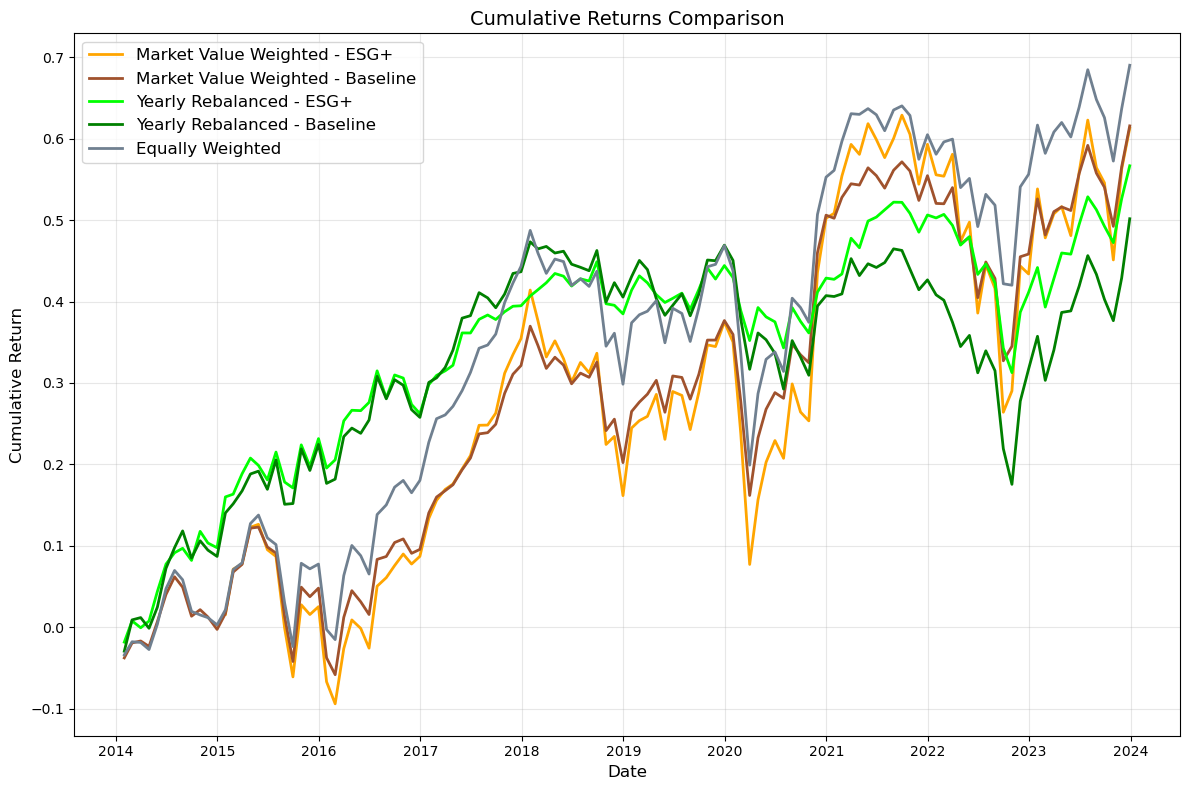

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio
0,P_vw (0.2),0.065101,0.154646,0.345505
1,Equally Weighted,0.069011,0.149373,0.383879
2,Market Value Weighted,0.061567,0.140286,0.355680


In [234]:
# Compare with other portfolios
statistics = pd.DataFrame({
    'Portfolio': ['P_vw (0.2)', 'Equally Weighted', 'Market Value Weighted'],
    'Annualized Return': [te_esg_ann_ret, ew_ann_ret, mw_ann_ret],
    'Annualized Standard Deviation': [te_esg_ann_std, ew_ann_std, mw_ann_std],
    'Sharpe Ratio': [te_esg_sharpe, ew_sharpe, mw_sharpe]
})

# Plot cumulative returns
plt.figure(figsize=(12, 8))

plt.plot(te_esg_cum_returns.index, te_esg_cum_returns.values, label='Market Value Weighted - ESG+', linewidth=2, color='orange')
plt.plot(mw_pf['year'], mw_pf['mv_return'].cumsum(), label='Market Value Weighted - Baseline', linewidth=2, color = "sienna")

plt.plot(rebenhanced[rebenhanced['year']<='2024']['year'], rebenhanced[rebenhanced['year']<='2024']['w_return'].cumsum(), label='Yearly Rebalanced - ESG+', linewidth=2, color = "lime")
plt.plot(reb_pf[reb_pf['year']<='2024']['year'], reb_pf[reb_pf['year']<='2024']['weighted_returns'].cumsum(), label='Yearly Rebalanced - Baseline', linewidth=2, color = "green")

plt.plot(ew_pf['year'], ew_pf['ew_m_ret'].cumsum(), label='Equally Weighted', linewidth=2, color = "slategray")

plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.title('Cumulative Returns Comparison', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cumulative_returns_comparison.png', dpi=300)
plt.show()

# Display statistics
statistics

In [114]:
# After running the tracking error minimization optimization for each year

# Create a DataFrame summarizing results by year
years = sorted(te_esg_weights.keys())
tracking_error_summary = pd.DataFrame({
    'Year': years,
    'Benchmark E-Score': [benchmark_escores[y] for y in years],
    'Portfolio E-Score': [portfolio_escores[y] for y in years],
    'Absolute Improvement': [portfolio_escores[y] - benchmark_escores[y] for y in years],
    'Improvement %': [(portfolio_escores[y]/benchmark_escores[y] - 1) * 100 for y in years],
    'Tracking Error (%)': [tracking_errors[y] * 100 for y in years]  # Convert to percentage
})

# Format the DataFrame for better display
formatted_summary = tracking_error_summary.copy()
formatted_summary['Benchmark E-Score'] = formatted_summary['Benchmark E-Score'].map('{:.4f}'.format)
formatted_summary['Portfolio E-Score'] = formatted_summary['Portfolio E-Score'].map('{:.4f}'.format)
formatted_summary['Absolute Improvement'] = formatted_summary['Absolute Improvement'].map('{:.4f}'.format)
formatted_summary['Improvement %'] = formatted_summary['Improvement %'].map('{:.2f}%'.format)
formatted_summary['Tracking Error (%)'] = formatted_summary['Tracking Error (%)'].map('{:.4f}%'.format)

print("Annual Performance Summary of E-Enhanced Tracking Error Portfolio:")
display(formatted_summary)



Annual Performance Summary of E-Enhanced Tracking Error Portfolio:


,Year,Benchmark E-Score,Portfolio E-Score,Absolute Improvement,Improvement %,Tracking Error (%)
0,2015,60.8053,72.9664,12.1611,20.00%,0.0830%
1,2016,62.4652,74.9583,12.4930,20.00%,0.0848%
2,2017,64.5444,77.4533,12.9089,20.00%,0.0558%
3,2018,65.5366,78.6439,13.1073,20.00%,0.1017%
4,2019,66.6915,80.0297,13.3383,20.00%,0.1017%
5,2020,68.9401,82.7281,13.7880,20.00%,0.0798%
6,2021,70.0053,84.0063,14.0011,20.00%,0.0702%
7,2022,72.8820,87.4583,14.5764,20.00%,0.0717%
8,2023,74.4496,89.3395,14.8899,20.00%,0.1080%


In [115]:
# Trade-off Analysis Between Financial and ESG Performance

# 1. Minimum Variance Portfolio Comparison (P(mv)_oos vs P(mv)_oos(0.2))
# The original minimum variance portfolio (P(mv)_oos) was optimized purely for risk minimization
# When we imposed the 20% higher ESG score constraint (P(mv)_oos(0.2)), we observed:
#   - An increase in portfolio variance (higher risk)
#   - Significant shifts in portfolio composition
#   - Exclusion of low-ESG scoring companies and increased weight for high-ESG companies
#   - The variance increase was the price paid for ESG improvement

# 2. Value-Weighted Portfolio Comparison (P(vw)_oos vs P(vw)_oos(0.2))
# The tracking error minimization approach shows:
#   - The market value weighted benchmark portfolio (P(vw)_oos) has lower ESG scores
#   - The ESG-enhanced portfolio (P(vw)_oos(0.2)) maintains similar exposure with 20% higher ESG
#   - This approach incurs tracking error (deviation from benchmark performance)
#   - Despite tracking error, the ESG-enhanced portfolio maintained competitive returns
#   - There's a direct trade-off between tracking error and ESG improvement

# Key findings on the financial vs extra-financial performance trade-off:
# - ESG enhancement generally comes at the cost of higher risk or tracking error
# - The 20% ESG improvement required significant portfolio recomposition
# - High ESG scoring firms gained more weight while low scoring firms were reduced/excluded
# - The improved portfolios maintained competitive financial performance
# - The trade-off magnitude varies by year and market conditions

# Visual comparison of the performance metrics shows that the ESG-enhanced portfolios
# can deliver comparable financial returns despite the constraints, suggesting that
# the trade-off may be acceptable for investors seeking both financial and ESG performance.